# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

## Current Model Note for cw3 

#### Basic imports

In [141]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization, LSTM, TimeDistributed
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K


import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [2]:
%load_ext autoreload
%autoreload 2

## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [142]:
# DEPRECATED: New clean file was generated, which we will be used from now on
base_df_old = pd.DataFrame()

clean_data_folder = "../pdiot-data/2021"

for sUNN_folder in os.listdir(clean_data_folder):
    path_directory = clean_data_folder+"/"+sUNN_folder
    if os.path.isdir(path_directory):
        print(sUNN_folder)
        for filename in os.listdir(path_directory):
            try:
                    if "Falling" in filename:
                        full_path = f"{clean_data_folder}/{sUNN_folder}/{filename}"
                        print(full_path)

                        # load data into a DataFrame
                        new_df = pd.read_csv(full_path)
    #                     print(new_df)

                        # merge into the base DataFrame
                        base_df_old = pd.concat([base_df_old, new_df])
            except Exception as e:
                print(e)
    else:
        print(sUNN_folder + " is not a directory")


README.md is not a directory
Respeck_recordings_clean.csv is not a directory
Thingy_recordings_clean.csv is not a directory
s1541031
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on knees_06-10-2021_15-48-40.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the back_06-10-2021_15-55-24.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the left_06-10-2021_16-04-18.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on knees_06-10-2021_16-24-12.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the back_06-10-2021_16-27-23.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the left_06-10-2021_16-40-12.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the right_06-10-2021_16-35-31.csv.csv
s1813106
../pdiot-data/2021/s1813106/Respeck_s1813106_Falling on knees_07-10-2021_12-17-42.csv
../pdiot-data/2021/s1813106/Respeck_

../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on the left_02-10-2021_20-12-47.csv
../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on the right_02-10-2021_20-14-46.csv
s1761322
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on knees_27-09-2021_11-13-39.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the back_06-10-2021_12-56-05.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the left_06-10-2021_12-59-21.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the right_06-10-2021_12-53-23.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on knees_27-09-2021_11-25-14.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on the back_27-09-2021_11-53-29.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on the left_27-09-2021_11-38-48.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on the right_27-09-2021_11-33-40.csv
s1800883
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on knees_29-09-2021_14-48-24.csv
../pdiot-data/2

../pdiot-data/2021/s1843072/Thingy_s1843072_Falling on the back_06-10-2021_15-18-50.csv
../pdiot-data/2021/s1843072/Thingy_s1843072_Falling on the left_06-10-2021_16-11-51.csv
../pdiot-data/2021/s1843072/Thingy_s1843072_Falling on the right_06-10-2021_15-59-59.csv
s1850642
../pdiot-data/2021/s1850642/Respeck_s1850642_Falling on knees_06-10-2021_12-58-05.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Falling on the back_06-10-2021_13-05-20.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Falling on the left_06-10-2021_13-00-12.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Falling on the right_06-10-2021_13-03-38.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Falling on knees_06-10-2021_11-49-52.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Falling on the back_06-10-2021_12-16-28.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Falling on the left_06-10-2021_12-11-12.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Falling on the right_06-10-2021_12-13-04.csv
s1864705
../pdiot-data

../pdiot-data/2021/s2171825/Thingy_s2171825_Falling on the left_06-10-2021_15-28-31.csv
../pdiot-data/2021/s2171825/Thingy_s2171825_Falling on the right_06-10-2021_15-32-45.csv
s2171931
../pdiot-data/2021/s2171931/Respeck_s2171931_Falling on knees_04-10-2021_16-09-21.csv
../pdiot-data/2021/s2171931/Respeck_s2171931_Falling on the back_04-10-2021_16-16-17.csv
../pdiot-data/2021/s2171931/Respeck_s2171931_Falling on the left_04-10-2021_16-11-30.csv
../pdiot-data/2021/s2171931/Respeck_s2171931_Falling on the right_04-10-2021_16-13-54.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on knees_04-10-2021_15-31-57.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the back_04-10-2021_15-39-04.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the left_04-10-2021_15-34-36.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the right_04-10-2021_15-36-53.csv
s2173036
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on knees_06-10-2021_13-39-32.csv
../pdiot-data/2

In [354]:
base_df_old = pd.DataFrame()

clean_data_folder = "../pdiot-data/2021"

for sUNN_folder in os.listdir(clean_data_folder):
    path_directory = clean_data_folder+"/"+sUNN_folder
    if os.path.isdir(path_directory):
        print(sUNN_folder)
        for filename in os.listdir(path_directory):
            try:
                    full_path = f"{clean_data_folder}/{sUNN_folder}/{filename}"
                    print(full_path)

                    # load data into a DataFrame
                    new_df = pd.read_csv(full_path)
#                     print(new_df)

                    # merge into the base DataFrame
                    base_df_old = pd.concat([base_df_old, new_df])
            except Exception as e:
                print(e)
    else:
        print(sUNN_folder + " is not a directory")


README.md is not a directory
Respeck_recordings_clean.csv is not a directory
Thingy_recordings_clean.csv is not a directory
s1541031
../pdiot-data/2021/s1541031/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on knees_06-10-2021_15-48-40.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the back_06-10-2021_15-55-24.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the left_06-10-2021_16-04-18.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Lying down on stomach_06-10-

../pdiot-data/2021/s1704145/Thingy_s1704145_Running_23-09-2021_11-11-04.csv
../pdiot-data/2021/s1704145/Thingy_s1704145_Sitting bent backward_23-09-2021_10-49-34.csv
../pdiot-data/2021/s1704145/Thingy_s1704145_Sitting bent forward_05-10-2021_18-32-50.csv
../pdiot-data/2021/s1704145/Thingy_s1704145_Sitting_23-09-2021_10-45-49.csv
../pdiot-data/2021/s1704145/Thingy_s1704145_Standing_23-09-2021_10-50-24.csv
../pdiot-data/2021/s1704145/Thingy_s1704145_Walking at normal speed_23-09-2021_11-08-53.csv
s1706154
../pdiot-data/2021/s1706154/Respeck_s1706154_Climbing stairs_05-10-2021_12-30-49.csv
../pdiot-data/2021/s1706154/Respeck_s1706154_Descending stairs_05-10-2021_12-31-30.csv
../pdiot-data/2021/s1706154/Respeck_s1706154_Desk work_05-10-2021_12-33-00.csv
../pdiot-data/2021/s1706154/Respeck_s1706154_Falling on knees_06-10-2021_12-38-48.csv
../pdiot-data/2021/s1706154/Respeck_s1706154_Falling on the back_06-10-2021_12-51-04.csv
../pdiot-data/2021/s1706154/Respeck_s1706154_Falling on the left_

../pdiot-data/2021/s1893835/Thingy_s1893835_Sitting_29-09-2021_10-53-14.csv
../pdiot-data/2021/s1893835/Thingy_s1893835_Standing_29-09-2021_10-55-38.csv
s1718069
../pdiot-data/2021/s1718069/Respeck_s1718069_Climbing_stairs_29-09-2021_12-31-14.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Descending_stairs_29-09-2021_12-31-50.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Desk work_29-09-2021_12-29-01.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Falling on knees_06-10-2021_18-14-51.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Falling on the back_06-10-2021_18-18-28.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Falling on the left_06-10-2021_18-17-39.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Falling on the right_06-10-2021_18-16-43.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Lying down left_04-10-2021_14-27-34.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Lying down on back_04-10-2021_14-26-49.csv
../pdiot-data/2021/s1718069/Respeck_s1718069_Lying down on s

../pdiot-data/2021/s1724067/Thingy_s1724067_Falling on the left_06-10-2021_20-29-11.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Falling on the right_06-10-2021_20-35-37.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Lying down left_06-10-2021_20-17-30.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Lying down on back_06-10-2021_20-14-27.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Lying down on stomach_06-10-2021_20-19-55.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Lying down right_06-10-2021_20-18-42.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Movement_06-10-2021_20-23-00.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Running_06-10-2021_19-56-22.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Sitting bent backward_06-10-2021_20-06-11.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Sitting bent forward_06-10-2021_20-07-11.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Sitting_06-10-2021_20-05-12.csv
../pdiot-data/2021/s1724067/Thingy_s1724067_Standing_06-10-2021_20-11

../pdiot-data/2021/s1732873/Respeck_s1732873_Running_04-10-2021_15-32-54.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting bent backward_04-10-2021_12-55-01.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting bent forward_04-10-2021_12-54-13.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Sitting_04-10-2021_12-53-07.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Standing_04-10-2021_12-55-45.csv
../pdiot-data/2021/s1732873/Respeck_s1732873_Walking at normal speed_04-10-2021_15-30-06.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Climbing stairs_04-10-2021_16-00-57.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Descending stairs_04-10-2021_16-01-37.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Desk work_04-10-2021_13-49-32.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Falling on knees_04-10-2021_14-16-47.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Falling on the back_04-10-2021_14-26-26.csv
../pdiot-data/2021/s1732873/Thingy_s1732873_Falling on the left_04-10-202

../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on knees_29-09-2021_14-48-24.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the back_29-09-2021_14-23-09.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the left_29-09-2021_14-33-04.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Falling on the right_29-09-2021_14-28-22.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down left_29-09-2021_13-40-06.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down on back_29-09-2021_13-38-01.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down on stomach_29-09-2021_13-39-15.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Lying down right_29-09-2021_13-41-27.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Movement_29-09-2021_14-52-02.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Running_29-09-2021_14-41-45.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Sitting bent backward_29-09-2021_13-35-01.csv
../pdiot-data/2021/s1800883/Respeck_s1800883_Sitti

../pdiot-data/2021/s1817455/Thingy_s1817455_Running_29-09-2021_14-58-21.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting bent backward_29-09-2021_14-25-28.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting bent forward_29-09-2021_14-23-21.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Sitting_29-09-2021_14-21-18.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Standing_29-09-2021_14-27-26.csv
../pdiot-data/2021/s1817455/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
s1817972
../pdiot-data/2021/s1817972/Respeck_s1817972_Climbing stairs_05-10-2021_14-15-10.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Descending stairs_05-10-2021_14-14-27.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Desk work_05-10-2021_11-25-28.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on knees_05-10-2021_11-27-06.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on the back_05-10-2021_11-49-17.csv
../pdiot-data/2021/s1817972/Respeck_s1817972_Falling on the left_

../pdiot-data/2021/s1823274/Thingy_s1823274_Falling on the right_04-10-2021_15-25-00.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down left_04-10-2021_13-45-54.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down on back_04-10-2021_13-45-13.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down on stomach_04-10-2021_13-47-19.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Lying down right_04-10-2021_13-46-38.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Movement_04-10-2021_13-43-54.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Running_04-10-2021_14-15-16.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting bent backward_04-10-2021_13-41-11.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting bent forward_04-10-2021_13-40-27.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Sitting_04-10-2021_13-39-49.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Standing_04-10-2021_13-41-51.csv
../pdiot-data/2021/s1823274/Thingy_s1823274_Walking at normal speed_04-10-2021_1

../pdiot-data/2021/s1841064/Respeck_s1841064_Sitting_06-10-2021_15-00-45.csv
../pdiot-data/2021/s1841064/Respeck_s1841064_Standing_06-10-2021_15-03-25.csv
../pdiot-data/2021/s1841064/Respeck_s1841064_Walking at normal speed_29-09-2021_13-49-01.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Climbing stairs_04-10-2021_14-27-51.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Descending stairs_04-10-2021_14-24-09.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Desk work_04-10-2021_14-05-23.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on knees_04-10-2021_14-53-10.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the back_04-10-2021_14-58-33.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the left_04-10-2021_15-09-46.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Falling on the right_04-10-2021_15-11-39.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down left_06-10-2021_13-07-16.csv
../pdiot-data/2021/s1841064/Thingy_s1841064_Lying down on back_04-10-2

../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down left_07-10-2021_16-42-45.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down on back_07-10-2021_16-41-06.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down on stomach_07-10-2021_16-43-31.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Lying down right_07-10-2021_16-41-56.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Movement_30-09-2021_12-22-05.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Running_30-09-2021_12-18-48.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting bent backward_30-09-2021_12-13-10.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting bent forward_30-09-2021_12-12-06.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Sitting_30-09-2021_12-11-22.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Standing_30-09-2021_12-14-03.csv
../pdiot-data/2021/s1850642/Respeck_s1850642_Walking at normal speed_30-09-2021_12-18-08.csv
../pdiot-data/2021/s1850642/Thingy_s1850642_Climbing stairs_29-09-

../pdiot-data/2021/s1865890/Thingy_s1865890_Walking at normal speed_07-10-2021_09-19-52.csv
s1870467
../pdiot-data/2021/s1870467/Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Descending stairs_06-10-2021_11-27-15.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Desk work_07-10-2021_12-17-59.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Falling on knees_07-10-2021_10-09-56.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Falling on the back_05-10-2021_09-31-28.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Falling on the left_05-10-2021_09-35-15.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Falling on the right_05-10-2021_09-27-37.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Lying down left_29-09-2021_11-47-37.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Lying down on back_29-09-2021_11-46-48.csv
../pdiot-data/2021/s1870467/Respeck_s1870467_Lying down on stomach_29-09-2021_11-49-18.csv
../pdiot-data/2021/s1870467/Re

../pdiot-data/2021/s1891214/Thingy_s1891214_Falling on the right_07-10-2021_17-34-54.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Lying down left_07-10-2021_15-39-15.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Lying down on back_07-10-2021_15-38-33.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Lying down on stomach_07-10-2021_15-40-44.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Lying down right_07-10-2021_15-39-56.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Movement_07-10-2021_15-46-20.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Running_07-10-2021_15-43-21.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Sitting bent backward_07-10-2021_15-28-08.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Sitting bent forward_07-10-2021_15-26-49.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Sitting_07-10-2021_15-37-05.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Standing_07-10-2021_15-37-44.csv
../pdiot-data/2021/s1891214/Thingy_s1891214_Walking at normal speed_07-10-2021_1

../pdiot-data/2021/s1970333/Respeck_s1970333_Sitting_13-10-2021_21-20-19.csv
../pdiot-data/2021/s1970333/Respeck_s1970333_Standing_13-10-2021_21-29-09.csv
../pdiot-data/2021/s1970333/Respeck_s1970333_Walking at normal speed_13-10-2021_22-06-18.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Climbing stairs_13-10-2021_23-35-47.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Descending stairs_13-10-2021_23-36-28.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Desk work_15-10-2021_02-30-14.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Falling on knees_14-10-2021_01-11-05.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Falling on the back_14-10-2021_01-12-52.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Falling on the left_14-10-2021_01-14-56.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Falling on the right_14-10-2021_01-21-59.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Lying down left_13-10-2021_21-33-10.csv
../pdiot-data/2021/s1970333/Thingy_s1970333_Lying down on back_13-10-2

../pdiot-data/2021/s2171825/Respeck_s2171825_Lying down on back_03-10-2021_21-33-28.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Lying down on stomach_03-10-2021_21-28-45.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Lying down right_03-10-2021_21-26-27.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Movement_03-10-2021_21-37-12.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Running_03-10-2021_22-06-19.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Sitting bent backward_03-10-2021_21-19-24.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Sitting bent forward_03-10-2021_21-18-07.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Sitting_03-10-2021_21-11-03.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Standing_03-10-2021_21-23-33.csv
../pdiot-data/2021/s2171825/Respeck_s2171825_Walking at normal speed_03-10-2021_22-05-32.csv
../pdiot-data/2021/s2171825/Thingy_s2171825_Climbing stairs_03-10-2021_22-07-33.csv
../pdiot-data/2021/s2171825/Thingy_s2171825_Descending stairs_03-10

../pdiot-data/2021/s2173036/Thingy_s2173036_Sitting_03-10-2021_22-36-58.csv
../pdiot-data/2021/s2173036/Thingy_s2173036_Standing_03-10-2021_22-39-54.csv
../pdiot-data/2021/s2173036/Thingy_s2173036_Walking at normal speed_03-10-2021_23-03-07.csv
s2181154
../pdiot-data/2021/s2181154/Respeck_s2181154_Climbing stairs_29-09-2021_14-01-56.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Descending stairs_03-10-2021_17-46-42.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Desk work_03-10-2021_17-48-15.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Falling on knees_07-10-2021_19-06-08.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Falling on the back_07-10-2021_19-09-461.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Falling on the left_07-10-2021_19-34-01.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Falling on the right_07-10-2021_19-13-44.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Lying down left_29-09-2021_14-06-32.csv
../pdiot-data/2021/s2181154/Respeck_s2181154_Lying down

../pdiot-data/2021/s2211162/Thingy_s2211162_Falling on the back_06-10-2021_09-42-29.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Falling on the left_06-10-2021_09-30-21.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Falling on the right_06-10-2021_09-37-19.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Lying down left_06-10-2021_09-13-00.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Lying down on back_06-10-2021_09-11-52.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Lying down on stomach_06-10-2021_09-15-28.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Lying down right_06-10-2021_09-14-09.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Movement_06-10-2021_09-21-56.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Running_06-10-2021_10-00-07.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Sitting bent backward_06-10-2021_09-09-43.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Sitting bent forward_06-10-2021_09-07-19.csv
../pdiot-data/2021/s2211162/Thingy_s2211162_Sitting_06-10

../pdiot-data/2021/s2250677/Respeck_s2250677_Movement_04-10-2021_16-30-39.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Running_04-10-2021_16-21-45.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Sitting bent backward_04-10-2021_16-08-21.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Sitting bent forward_04-10-2021_16-07-07.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Sitting_04-10-2021_16-06-14.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Standing_04-10-2021_16-09-34.csv
../pdiot-data/2021/s2250677/Respeck_s2250677_Walking at normal speed_04-10-2021_16-20-14.csv
../pdiot-data/2021/s2250677/Thingy_s2250677_Climbing stairs_06-10-2021_13-43-53.csv
../pdiot-data/2021/s2250677/Thingy_s2250677_Descending stairs_06-10-2021_13-45-01.csv
../pdiot-data/2021/s2250677/Thingy_s2250677_Desk work_06-10-2021_13-48-25.csv
../pdiot-data/2021/s2250677/Thingy_s2250677_Falling on knees_06-10-2021_13-49-57.csv
../pdiot-data/2021/s2250677/Thingy_s2250677_Falling on the back_06-10-2021_13-58-22

In [143]:
#Trying out merging old falling data with clean data
base_df_old = base_df_old[base_df_old['sensor_type'] == 'Respeck']
filtered_base_df_old = pd.DataFrame()
for rid, group in base_df_old.groupby("subject_id"):
    if rid in base_df.subject_id.values:
        filtered_base_df_old = pd.concat([filtered_base_df_old,group])
    else:
        print("remove ", rid)
base_df_old = filtered_base_df_old

falling_activities= ['Falling on knees', 'Falling on the back', 'Falling on the left', 'Falling on the right']
for act in falling_activities:
    base_df = remove_activity_label(base_df,act)

base_df = pd.concat([base_df,base_df_old])

In [355]:
base_df_old = base_df_old[base_df_old['sensor_type'] == 'Respeck'] 
base_df = base_df_old.copy()

In [5]:
#Load Clean Respeck Recording to base_df
clean_data_folder = "../pdiot-data/2021/Respeck_recordings_clean.csv"
base_df = pd.read_csv(clean_data_folder)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
columns_of_interest_initial = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z','subject_id','activity_code', 'activity_type','recording_id']
# columns_of_

In [144]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)



In [293]:


# window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
# step_size = 25 # this is 50% overlap (step_size=25)

# X_train_sliding_windows = group_into_sliding_windows(base_df,window_size,step_size,step_size_falling=25)

# summ= 0 
# print("training")
# for act in ["Falling (Grouped)"]:
#     print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))
#     summ+=len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act])
#     for subj in X_train_sliding_windows.subject_id.unique():
#         subj_df = X_train_sliding_windows[X_train_sliding_windows.subject_id == subj]
#         print(subj, " :" , len(subj_df[subj_df.activity_type == act]))
#     print()

# base_df_old_grouped = group_falling_together(base_df_old)

# X_train_sliding_windows = group_into_sliding_windows(base_df_old_grouped,window_size,step_size,step_size_falling=25)
# print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == "Falling (Grouped)"]))

# print(summ == len(X_train_sliding_windows[X_train_sliding_windows.activity_type == "Falling (Grouped)"]))

           timestamp   accel_x   accel_y   accel_z     gyro_x     gyro_y  \
0       1.633532e+12 -0.282471 -0.904602  0.451111   9.078125  39.078125   
1       1.633532e+12  0.222656 -1.020081  0.120544   2.484375 -14.640625   
2       1.633532e+12  0.327393 -0.915344  0.309509   8.984375  13.265625   
3       1.633532e+12  0.093994 -0.904846  0.152771  11.281250   2.062500   
4       1.633532e+12  0.211426 -0.992737  0.173279  -1.828125   2.546875   
...              ...       ...       ...       ...        ...        ...   
760045  1.633509e+12 -0.500488 -0.236389  0.887146   0.148438   0.046875   
760046  1.633509e+12 -0.490967 -0.247620  0.902039   0.093750  -0.058594   
760047  1.633509e+12 -0.496582 -0.229309  0.893250   0.199219  -0.171875   
760048  1.633509e+12 -0.494629 -0.241760  0.893738  -0.097656  -0.175781   
760049  1.633509e+12 -0.494385 -0.240295  0.898621   0.187500  -0.015625   

          gyro_z sensor_type      activity_type  activity_code subject_id  \
0      -8.

In [245]:
for rid, group in base_df.groupby("subject_id"):
    print(f"The number of activities done by {rid} are: {len(group.activity_type.unique())}")
    print(group.activity_type.unique())


The number of activities done by s1541031 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1704145 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1706154 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1711661 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1718069 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1721256 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1724067 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at 

## Utilities

In [ ]:
def get_activity_code():
    

In [37]:
base_df.activity_type.unique()

array(['Climbing stairs', 'Descending stairs', 'Desk work',
       'Falling on knees', 'Falling on the back', 'Falling on the left',
       'Falling on the right', 'Lying down left', 'Lying down on back',
       'Lying down on stomach', 'Lying down right', 'Movement', 'Running',
       'Sitting bent backward', 'Sitting bent forward', 'Sitting',
       'Standing', 'Walking at normal speed'], dtype=object)

In [6]:
def remove_activity_label(df, activity_to_remove):
    df = df[df.activity_type!=activity_to_remove]
    return df

In [152]:

base_df = remove_activity_label(base_df,'Movement')
base_df =  remove_activity_label(base_df,'Desk work')
base_df =  remove_activity_label(base_df,'Climbing stairs')
base_df =  remove_activity_label(base_df,'Descending stairs')


In [25]:
for act in base_df.activity_type.unique():
    print(act , " ", len(base_df[base_df.activity_type==act]))

Falling (Grouped)   139234
Lying (Grouped)   141896
Running   34530
Sitting/Standing   140748
Walking at normal speed   34616


## Preprocessing - trials

In [146]:
#Smooth signal
new_df = pd.DataFrame()
for rid, group in base_df.groupby("recording_id"):
    try:
        group[columns_of_interest_training] = group[columns_of_interest_training].apply(lambda x: signal.savgol_filter(x,5,1))
        new_df = pd.concat([new_df,group])
    except:
        new_df = pd.concat([new_df,group])
base_df= new_df

In [53]:
def resample(X,y):
    oversample = SMOTE(random_state=1)
    X,y=  oversample.fit_resample(X,y)
#     undersample = RandomUnderSampler(random_state=1)
#     X,y=  undersample.fit_resample(X,y)
    return X,y


In [15]:
#Experimenting: Normalising data - FAIL
#Provides lower accuracy 
normalised = []
for rid, group in base_df.groupby("activity_type"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training]=(group[columns_of_interest_training]-group[columns_of_interest_training].mean())/group[columns_of_interest_training].std()

    normalised.append(group)
new_df = pd.concat(normalised)

Processing rid = Falling (Grouped)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1031659/3610054918.py", line 7, in <module>
    group[columns_of_interest_training]=(group[columns_of_interest_training]-group[columns_of_interest_training].mean())/group[columns_of_interest_training].std()
NameError: name 'columns_of_interest_training' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2064, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent ca

TypeError: object of type 'NoneType' has no len()

In [119]:
#Experimenting: Normalising data v2 (Normalise ALL data) -

base_df[columns_of_interest_training]=(base_df[columns_of_interest_training]-base_df[columns_of_interest_training].mean())/base_df[columns_of_interest_training].std()


In [207]:
#Passing difference of values for training - FAIL
differences = []
for rid, group in base_df.groupby("recording_id"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training] = group[columns_of_interest_training].diff()
    differences.append(group)
new_df = pd.concat(differences)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-2021_18-30-14
Processing rid = Respeck_

Processing rid = Respeck_s1801931_Sitting bent backward_05-10-2021_22-58-02
Processing rid = Respeck_s1801931_Sitting bent forward_05-10-2021_22-56-09
Processing rid = Respeck_s1801931_Sitting_05-10-2021_22-46-37
Processing rid = Respeck_s1801931_Standing_05-10-2021_22-38-33
Processing rid = Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32
Processing rid = Respeck_s1813106_Descending stairs_07-10-2021_11-35-40
Processing rid = Respeck_s1813106_Desk work_07-10-2021_01-12-36
Processing rid = Respeck_s1813106_Lying down left_06-10-2021_20-22-50
Processing rid = Respeck_s1813106_Lying down on back_06-10-2021_20-26-49
Processing rid = Respeck_s1813106_Lying down on stomach_06-10-2021_20-25-39
Processing rid = Respeck_s1813106_Lying down right_06-10-2021_20-23-35
Processing rid = Respeck_s1813106_Movement_07-10-2021_01-18-49
Processing rid = Respeck_s1813106_Running_07-10-2021_00-34-58
Processing rid = Respeck_s1813106_Sitting bent backward_06-10-2021_20-16-19
Processing rid = Re

Processing rid = Respeck_s1865890_Desk work_05-10-2021_18-26-33
Processing rid = Respeck_s1865890_Lying down left_05-10-2021_18-18-11
Processing rid = Respeck_s1865890_Lying down on back_05-10-2021_18-17-22
Processing rid = Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06
Processing rid = Respeck_s1865890_Lying down right_05-10-2021_18-19-15
Processing rid = Respeck_s1865890_Movement_06-10-2021_09-57-59
Processing rid = Respeck_s1865890_Running_06-10-2021_10-07-41
Processing rid = Respeck_s1865890_Sitting bent backward_05-10-2021_18-14-54
Processing rid = Respeck_s1865890_Sitting bent forward_05-10-2021_18-10-45
Processing rid = Respeck_s1865890_Sitting_06-10-2021_10-31-42
Processing rid = Respeck_s1865890_Standing_05-10-2021_18-16-13
Processing rid = Respeck_s1865890_Walking at normal speed_06-10-2021_10-06-40
Processing rid = Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24
Processing rid = Respeck_s1870467_Descending stairs_06-10-2021_11-27-15
Processing rid = Respeck_

Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-30
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-36
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-45
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-56
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-19
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-24
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-33
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-39
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-57
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-35
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-04-01
Processing rid = Respeck_

Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-39
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-40
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-41
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-42
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-43
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-44
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-45
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-46
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-47
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-48
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-49
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-50
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-51
Processing rid = Respeck_

In [110]:
#Preprocessing outliers, meh. So far no improvements
#Update: works decent with normalising all columns. No improvement, but better to keep it for stability of data.
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())

In [200]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1.633516e+12,0.605850,-0.458647,-0.906371,-0.447552,5.827068,17.871429,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.229341,0.110179,-0.865967,-2.440559,1.323308,-8.442857,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,1.633516e+12,0.777159,-0.177848,-0.640249,2.454545,11.766917,-9.614286,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,1.633516e+12,0.676416,-0.620879,-0.582751,-1.699301,1.195489,5.428571,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,1.633516e+12,0.215413,-0.056969,-0.441336,-6.496503,2.511278,7.485714,Respeck,Non-Stationary,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492670,1.633546e+12,-0.376509,-0.099479,0.386558,2.034965,0.714286,8.514286,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492671,1.633546e+12,-0.336583,-0.121457,0.417638,1.076923,-1.353383,10.485714,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492672,1.633546e+12,-0.483287,-0.170619,0.434343,1.867133,-1.789474,6.842857,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...
492673,1.633546e+12,-0.436397,-0.162233,0.456488,2.090909,-0.157895,3.228571,Respeck,Non-Stationary,1.0,s2211228,NaN,Respeck_s2211228_Walking at normal speed_06-10...


In [94]:
base_df= new_df
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

NameError: name 'new_df' is not defined

In [210]:
#Minmaxscaler Attempt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())


In [5]:
len(base_df.activity_type.values == 'Falling on Knees')



NameError: name 'columns_of_interest_training' is not defined

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [6]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Standing' 'Movement' 'Lying down on stomach'
 'Sitting bent backward' 'Lying down left' 'Lying down on back'
 'Descending stairs' 'Sitting bent forward' 'Walking at normal speed'
 'Running' 'Lying down right' 'Desk work' 'Sitting' 'Falling on knees'
 'Falling on the back' 'Falling on the right' 'Falling on the left']
The number of unique recordings is: 876
The subject IDs in the recordings are: 46


## Split by subject id

In [6]:
from sklearn.model_selection import GroupShuffleSplit

X_with_subject_id = base_df[columns_of_interest_initial]
y_with_subject_id = base_df['activity_code']



# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=2)

train_ix, test_ix = next(gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id))


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]




# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)




In [8]:
#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [10]:
def overlap_class_labels_for_training_and_testing(training_set, testing_set):
    training_set = []
#     subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]
    class_labels = []
    return training_set, class_labels


def group_into_sliding_windows(df,window_size=50,step_size=25, step_size_falling=5):

    window_number = 0 # start a counter at 0 to keep track of the window number

    all_overlapping_windows = []


    for rid, group in df.groupby("recording_id"):
#         print(f"Processing rid = {rid}")
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

        overlapping_windows =[]
        #TODO: Change the label into activity codes, since we are changing the activity types
        if group['activity_type'].unique()[0] == grouped_falling_label:
            overlapping_windows = large_enough_windows[::step_size_falling] 

        else:
            overlapping_windows = large_enough_windows[::step_size] 
#         print(len(overlapping_windows))
        # then we will append a window ID to each window
        if overlapping_windows:
            for window in overlapping_windows:
                window.loc[:, 'window_id'] = window_number
                window_number += 1


            all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
        
    final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)
    
    #Test to see if there are any elements that have NaN
    is_NaN = final_sliding_windows.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = final_sliding_windows[row_has_NaN]

    print(rows_with_NaN)
    return final_sliding_windows.reset_index(drop=True)

In [385]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
29
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
30
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
30
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
29
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
29
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
30
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
30
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
30
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
30
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
29
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
29
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
29
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
29
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-

30
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
30
Processing rid = Respeck_s1757177_Lying down right_06-10-2021_20-38-38
30
Processing rid = Respeck_s1757177_Movement_06-10-2021_16-44-16
30
Processing rid = Respeck_s1757177_Running_02-10-2021_14-09-21
30
Processing rid = Respeck_s1757177_Sitting bent backward_06-10-2021_16-40-06
30
Processing rid = Respeck_s1757177_Sitting bent forward_06-10-2021_16-41-05
30
Processing rid = Respeck_s1757177_Sitting_02-10-2021_13-38-45
30
Processing rid = Respeck_s1757177_Standing_02-10-2021_13-46-10
30
Processing rid = Respeck_s1757177_Walking at normal speed_02-10-2021_14-01-07
30
Processing rid = Respeck_s1761322_Climbing stairs_06-10-2021_11-51-15
29
Processing rid = Respeck_s1761322_Descending stairs_06-10-2021_11-52-16
29
Processing rid = Respeck_s1761322_Desk work_06-10-2021_12-22-13
29
Processing rid = Respeck_s1761322_Lying down left_27-09-2021_11-00-29
29
Processing rid = Respeck_s1761322_Lying down on back_27-

29
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
29
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
29
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
29
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
29
Processing rid = Respeck_s1824891_Desk work_06-10-2021_16-55-14
29
Processing rid = Respeck_s1824891_Lying down left_06-10-2021_16-48-30
29
Processing rid = Respeck_s1824891_Lying down on back_06-10-2021_16-45-46
29
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
29
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
29
Processing rid = Respeck_s1824891_Movement_06-10-2021_16-53-11
29
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
29
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
29
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
29
Processing rid = Respeck_s1824891_Sitting_07-

ValueError: No objects to concatenate

In [383]:
X_train_sliding_windows['recording_id']

0         Respeck_s1541031_Climbing stairs_06-10-2021_11...
1         Respeck_s1541031_Climbing stairs_06-10-2021_11...
2         Respeck_s1541031_Climbing stairs_06-10-2021_11...
3         Respeck_s1541031_Climbing stairs_06-10-2021_11...
4         Respeck_s1541031_Climbing stairs_06-10-2021_11...
                                ...                        
932870    xlstry-Respeck_s2254050_Lying down on back_06-...
932871    xlstry-Respeck_s2254050_Lying down on back_06-...
932872    xlstry-Respeck_s2254050_Lying down on back_06-...
932873    xlstry-Respeck_s2254050_Lying down on back_06-...
932874    xlstry-Respeck_s2254050_Lying down on back_06-...
Name: recording_id, Length: 932875, dtype: object

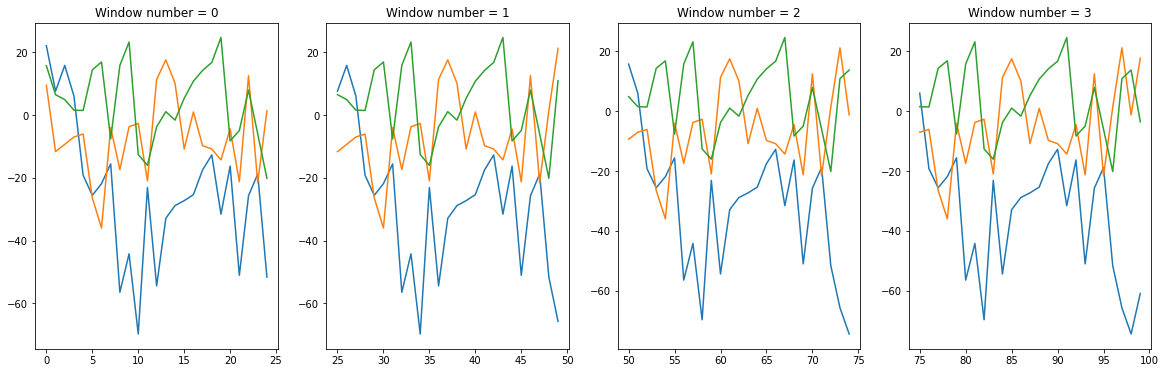

In [316]:
first_four_windows = [group for _, group in X_train_sliding_windows[X_train_sliding_windows.window_id < 4].groupby("window_id")]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

### Grouping Falling together, Lying together, Sitting/Standing together


In [11]:
grouped_falling_label = 'Falling (Grouped)'
grouped_lying_label = 'Lying (Grouped)'
grouped_sitting_or_standing_label = 'Sitting/Standing'


def grouping_activities_together(base_df, individual_activities_to_group, new_label):
    grouped_dataframes = []
    for act, group in base_df.groupby("activity_type"):
        if act in individual_activities_to_group:
            group['activity_type'] = new_label

        grouped_dataframes.append(group)
    base_df = pd.concat(grouped_dataframes)
    return base_df

#TODO: Could be done faster in one line or two
def group_falling_together(base_df):
    falling_activities= ['Falling on knees', 'Falling on the back', 'Falling on the left', 'Falling on the right']
    base_df = grouping_activities_together(base_df, falling_activities, grouped_falling_label)
    return base_df
  

def group_lying_together(base_df):
    lying_activities = ['Lying down left', 'Lying down right', 'Lying down on back', 'Lying down on stomach']
    base_df = grouping_activities_together(base_df, lying_activities, grouped_lying_label)
    return base_df
    
def group_sitting_and_standing_together(base_df):
    sitting_or_standing_activites= ['Sitting','Standing','Sitting bent forward', 'Sitting bent backward']
    base_df = grouping_activities_together(base_df, sitting_or_standing_activites, grouped_sitting_or_standing_label)
    return base_df
  


In [153]:
base_df = group_falling_together(base_df)
base_df = group_lying_together(base_df)
base_df = group_sitting_and_standing_together(base_df)


### Grouping by stationary vs non-stationary

In [167]:

stationary_activities= sorted(['Sitting','Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Sitting bent forward',  'Sitting bent backward'])
non_stationary_activities = sorted(['Desk work', 'Movement', 'Walking at normal speed', 'Running', 'Climbing stairs', 'Descending stairs', grouped_falling_label])

#TODO: Could be done faster in one line or two
def group_stationary_vs_non_stationary(base_df):
    grouped_dataframes = []
    base_df = group_falling_together(base_df)
    for act, group in base_df.groupby("activity_type"):
        if act in stationary_activities:
            group['activity_type'] = 'Stationary'
        else:
            group['activity_type'] = 'Non-Stationary'
        grouped_dataframes.append(group)
    
    base_df = pd.concat(grouped_dataframes)
    return base_df
    



In [ ]:
base_df = group_stationary_vs_non_stationary(base_df)

## Generate class labels

In [154]:
class_labels = {}
label_to_activity = {}
activities = sorted(base_df.activity_type.unique())

for idx, activity in enumerate(activities):
    class_labels[activity] = idx
    label_to_activity[idx] = activity

print(class_labels)

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


In [40]:

# window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
# window_id_class_labels


           timestamp   accel_x   accel_y   accel_z      gyro_x     gyro_y  \
83326   1.633629e+12 -0.019775 -0.971741  0.170349   11.312500   1.843750   
83327   1.633629e+12 -0.004639 -0.904846  0.126648   18.312500   2.000000   
83328   1.633629e+12  0.024658 -0.914612  0.127869   23.187500   1.015625   
83329   1.633629e+12  0.016846 -0.908020  0.065857   29.281250   0.640625   
83330   1.633629e+12  0.060791 -0.789124  0.052673   35.343750   3.250000   
...              ...       ...       ...       ...         ...        ...   
418669  1.633295e+12  0.820068 -0.552063 -1.210022  -44.609375  -8.015625   
418670  1.633295e+12  1.833008 -2.000000 -1.062073   32.046875   1.203125   
418671  1.633295e+12  0.590576 -1.742493 -0.194885   70.343750  17.734375   
418672  1.633295e+12  0.343750 -0.438782  0.658142 -133.562500 -86.484375   
418673  1.633295e+12  0.435791 -0.920471 -0.194641 -118.093750 -96.390625   

           gyro_z sensor_type      activity_type  activity_code subject_id 

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

### Setting up the model

In [14]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = len(class_labels)
# n_classes = 12

print(n_classes)

5


## Random forest

In [241]:
# now extract all features
feature_list_train = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_train_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_train.append(new_features)
    
feature_list_train = pd.concat(feature_list_train, axis=1)

feature_list_train

Feature Extraction: 100%|███████████████████████| 15/15 [00:11<00:00,  1.36it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-13.829346,-0.955444,-0.987810,14.0,0.193926,0.037607,1.006666,-0.748291,-1.337646,1.131958,...,-36.015625,61.218750,3.210938,4.372768,14.0,11.397518,129.903420,12.207560,23.234375,-16.046875
1,-14.131348,-0.968384,-1.009382,14.0,0.185946,0.034576,1.026366,-0.749268,-1.337646,1.194702,...,-36.015625,76.578125,8.031250,5.469866,14.0,11.890979,141.395384,13.088729,23.234375,-16.046875
2,-14.284180,-0.949341,-1.020299,14.0,0.232610,0.054107,1.046478,-0.700439,-1.373291,0.609253,...,-21.593750,27.296875,-0.296875,1.949777,14.0,11.364695,129.156291,11.530738,24.687500,-16.046875
3,-14.439453,-0.977295,-1.031390,14.0,0.212675,0.045231,1.053088,-0.700439,-1.373291,1.235474,...,-21.593750,58.171875,6.617188,4.155134,14.0,11.723895,137.449723,12.438443,24.687500,-20.187500
4,-14.219483,-0.982544,-1.015677,14.0,0.182119,0.033167,1.031876,-0.700439,-1.373291,0.544067,...,-24.656250,-31.968750,-3.335938,-2.283482,14.0,9.036869,81.664999,9.320906,13.796875,-20.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75777,-7.021728,-0.499878,-0.501552,14.0,0.006364,0.000041,0.501592,-0.490967,-0.511230,-3.270386,...,-0.175781,1.558594,0.113281,0.111328,14.0,0.041386,0.001713,0.118772,0.179688,0.035156
75778,-6.954102,-0.496582,-0.496722,14.0,0.004161,0.000017,0.496739,-0.490967,-0.506104,-3.324097,...,-0.175781,1.265625,0.085938,0.090402,14.0,0.032810,0.001077,0.096172,0.148438,0.035156
75779,-6.907959,-0.492065,-0.493426,14.0,0.003277,0.000011,0.493437,-0.489014,-0.500488,-3.366333,...,-0.351562,1.007812,0.068359,0.071987,14.0,0.038008,0.001445,0.081404,0.148438,0.000000
75780,-6.914795,-0.492065,-0.493914,14.0,0.004250,0.000018,0.493932,-0.488770,-0.501953,-3.370972,...,-0.925781,0.378906,0.037109,0.027065,14.0,0.068832,0.004738,0.073961,0.148438,-0.097656


In [242]:
# now extract all features
feature_list_test = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_test_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_test.append(new_features)
    
feature_list_test = pd.concat(feature_list_test, axis=1)

feature_list_test

Feature Extraction: 100%|███████████████████████| 15/15 [00:03<00:00,  4.68it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-1.807861,-0.105957,-0.129133,14.0,0.279945,0.078369,0.308293,0.246338,-0.935547,-10.919495,...,24.484375,144.812500,11.242188,10.343750,14.0,11.382465,129.560512,15.380302,30.34375,-7.125000
1,-1.473633,-0.088867,-0.105259,14.0,0.119717,0.014332,0.159410,0.141113,-0.293457,-11.189270,...,-6.453125,141.265625,12.632812,10.090402,14.0,14.649170,214.598186,17.788041,30.34375,-21.156250
2,-1.718750,-0.066895,-0.122768,14.0,0.236256,0.055817,0.266250,0.141113,-0.850830,-12.911194,...,-6.453125,36.203125,5.156250,2.585938,14.0,20.904858,437.013070,21.064191,30.34375,-27.328125
3,-2.724854,-0.188232,-0.194632,14.0,0.214564,0.046038,0.289689,0.127930,-0.850830,-13.492981,...,-6.453125,-99.734375,-8.140625,-7.123884,14.0,13.637797,185.989518,15.386333,22.21875,-27.328125
4,-3.861572,-0.257935,-0.275827,14.0,0.207991,0.043260,0.345457,0.127930,-0.850830,-10.245972,...,-7.062500,-41.828125,-1.148438,-2.987723,14.0,11.910460,141.859067,12.279477,11.84375,-27.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,-3.728760,-0.289307,-0.266340,14.0,0.085188,0.007257,0.279632,-0.136475,-0.384033,-13.504272,...,-16.328125,-22.687500,-2.140625,-1.620536,14.0,6.125400,37.520523,6.336139,6.78125,-10.359375
20835,-3.358643,-0.236572,-0.239903,14.0,0.075101,0.005640,0.251383,-0.136475,-0.384033,-13.209595,...,-16.328125,-39.906250,-3.375000,-2.850446,14.0,5.016236,25.162623,5.769547,4.34375,-10.359375
20836,-3.703125,-0.261841,-0.264509,14.0,0.071788,0.005154,0.274078,-0.163086,-0.464111,-12.764282,...,-2.328125,-29.531250,0.171875,-2.109375,14.0,4.995768,24.957694,5.422837,3.50000,-10.609375
20837,-4.010986,-0.289673,-0.286499,14.0,0.064935,0.004217,0.293766,-0.210938,-0.464111,-13.066773,...,-3.625000,-7.328125,1.140625,-0.523438,14.0,5.457238,29.781451,5.482284,6.03125,-14.281250


In [243]:
window_id_class_labels_train = X_train_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels_test = X_test_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)


In [244]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(feature_list_train, window_id_class_labels_train)

y_pred = rfc.predict(feature_list_test)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
print(classification_report(y_pred=y_pred, y_true=window_id_class_labels_test))

              precision    recall  f1-score   support

           0       0.38      0.30      0.34      1375
           1       0.47      0.49      0.48      1356
           2       0.50      0.46      0.48      1506
           3       0.53      0.69      0.60       432
           4       0.95      0.99      0.97      5986
           5       0.42      0.61      0.50      1505
           6       0.98      0.91      0.94      1350
           7       0.88      0.84      0.86      5976
           8       0.51      0.38      0.43      1353

    accuracy                           0.75     20839
   macro avg       0.62      0.63      0.62     20839
weighted avg       0.75      0.75      0.75     20839



### LSTM

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM

def define_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(100, input_shape=(timesteps,n_features)))
              
    model.add(Dropout(0.1)) 
    # Dropout layer
#     model.add(Dropout(0.2)) 
    # Dense layer with ReLu
    # model.add(Dense(units = 32, activation='relu'))
    # model.add(Dropout(0.5)) 

    model.add(Dense(units = 100, activation='relu'))
    model.add(Dropout(0.2)) 

    # model.add(Dense(32, activation='relu',input_shape=(timesteps,n_features)))
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model




In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM

def define_LSTM_model_2(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(64, return_sequences=True, input_shape=(timesteps,n_features)))
    model.add(LSTM(64))

    # model.add(Dense(32, activation='relu',input_shape=(timesteps,n_features)))
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model


In [14]:

from tensorflow.keras.layers import LSTM

def define_simple_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(64, input_shape=(timesteps,n_features)))

    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model

In [15]:
from tensorflow.keras.layers import LSTM, Bidirectional
def define_Bidirectional_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(Bidirectional(
        LSTM(units=128),
        input_shape=(timesteps,n_features)
        
    ))



    model.add(Dropout(0.5)) 
    model.add(Dense(units = 128, activation='relu'))

    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model


## CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

In [15]:
def define_CNN_model(filters,kernel_size,window_size,n_features,n_classes):
    model = Sequential()

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                     input_shape=(window_size, n_features)))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))

    model.add(Dropout(0.2))

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))

    model.add(Dropout(0.2))


    model.add(Flatten())
    model.add(Dense(156, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(n_classes, activation='softmax'))

    print(model.summary())
    return model
    

In [17]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
def define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model

In [202]:
def define_CNN_model_3(filters,kernel_size,window_size,n_features,n_classes):
    model = Sequential()

    model.add(Conv1D(filters=filters, kernel_size=3, activation='linear', 
                     input_shape=(window_size, n_features)))

    model.add(BatchNormalization())
    model.add(Activation(activation))

    
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))

    
#     model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
    
     
#     model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
    
    
     




    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    print(model.summary())
    return model

In [47]:
def define_CNN_model_4(filters,kernel_size,window_size,n_features,n_classes):
        
    model = Sequential()

    model.add(Conv1D(filters=24, kernel_size=2, activation='relu', 
                     input_shape=(window_size, n_features)))
    
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
              
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model
    

In [217]:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9065078
def define_CNN_LSTM_approach():
    model = Sequential()
    
    model.add(TimeDistributed(
        Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'), 
                     input_shape=(None,window_size, n_features))
           )
    model.add(TimeDistributed(BatchNormalization()))

    model.add(TimeDistributed(
        Activation(activation))
            )
    

    model.add(TimeDistributed(
        Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
           )
    model.add(TimeDistributed(BatchNormalization()))

    model.add(TimeDistributed(
        Activation(activation))
            )
    model.add(TimeDistributed(Flatten()))
    
#     model.add(TimeDistributed(cnn))
    model.add(LSTM(128))
#     model.add(Activation(activation))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model
    


### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [16]:
#Subject id is of interest to us as we will split our dataset by subject_id
columns_of_interest_training = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
columns_of_interest_training

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
def regenerate_data_from_sliding_windows(final_sliding_windows):
    X= []
    y= []

    for window_id, group in final_sliding_windows.groupby('window_id'):
        
#         print(f"window_id = {window_id}")

        shape = group[columns_of_interest_training].values.shape
#         print(f"shape = {shape}")

        X.append(group[columns_of_interest_training].values )
        y.append(class_labels[group["activity_type"].values[0]])
    
    return X,y


In [157]:
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)


KeyboardInterrupt: 

We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [18]:
def convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated):
    
    # #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
    y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)
    y_test = np.asarray(pd.get_dummies(y_test_regenerated), dtype=np.float32)

    X_train = np.asarray(X_train_regenerated)
    X_test = np.asarray(X_test_regenerated)

    print(f"X_train shape = {X_train.shape}")
    print(f"y_train shape = {y_train.shape}")

    print(f"X_test shape = {X_test.shape}")
    print(f"y_test shape = {y_test.shape}")
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

Now we are ready to start the training process

In [341]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# model.compile(
#     optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001, nesterov=True),
#     loss="categorical_crossentropy",
#     metrics = ['accuracy'])
model.compile(
      optimizer = optimizers.Adam(learning_rate=0.001),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train,
            batch_size=4048, epochs=200, callbacks=[callback],
            validation_data=(X_test, y_test),
    )

In [303]:
X_test.shape

(10224, 25, 6)

In [304]:
X_train.shape

(37315, 25, 6)

In [53]:
base_df.loc[base_df['activity_type'].isin(['Desk work' 'Movement' 'Sitting bent forward' 'Walking at normal speed'
 'Sitting bent backward' 'Standing' 'Lying down left' 'Lying down right'
 'Lying down on back' 'Lying down on stomach' 'Running' 'Sitting'])]
ll = base_df[base_df['activity_type'].isin(['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting'])]

ll['activity_code']

769       100.0
770       100.0
771       100.0
772       100.0
773       100.0
          ...  
492670      5.0
492671      5.0
492672      5.0
492673      5.0
492674      5.0
Name: activity_code, Length: 422481, dtype: float64

## Coding Playground

In [ ]:
temp_class_labels = ['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting']

subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]

In [155]:
subset_base_df = base_df

In [46]:
subset_base_df = pd.DataFrame()
for rid, group in base_df.groupby("activity_type"):
    group = group[:35000].reset_index(drop=True)
    subset_base_df = pd.concat([subset_base_df,group])


In [134]:
for act in class_labels:
    print(act, " :" , len(subset_base_df[subset_base_df.activity_type == act]))

Falling (Grouped)  : 139234
Lying (Grouped)  : 141896
Running  : 34530
Sitting/Standing  : 140748
Walking at normal speed  : 34616


In [156]:
from sklearn.model_selection import LeaveOneGroupOut, GroupShuffleSplit

X_with_subject_id = subset_base_df[columns_of_interest_initial].reset_index(drop=True)
y_with_subject_id = subset_base_df['activity_code'].reset_index(drop=True)



#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=1)
gs_generator = gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)

logo = LeaveOneGroupOut()
logo_generator = logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)


#### TODO:
#Make sure to polish the code, and add a try except statement when the generators are at the end of their iteration

In [157]:
print("*" * 80)

train_ix, test_ix = next(gs_generator)


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]




print(X_test_df['activity_type'].unique())
print("Number of activities:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

********************************************************************************
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
Number of activities: 5
The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10
Testing on subject id: ['s1706154' 's1711661' 's1841064' 's1842093' 's1843072' 's1850642'
 's1870697' 's2119637' 's2211228' 's1893835'] 


In [106]:
len(z)

384426

In [67]:
print("*" * 80)

train_ix, test_ix = next(logo_generator)
X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

print("Activities in Test: ", X_test_df['activity_type'].unique())
print("Number of activities in train:", len(X_train_df['activity_type'].unique()))
print("Number of activities in test:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


********************************************************************************
Activities in Test:  ['Lying (Grouped)' 'Sitting/Standing']
Number of activities in train: 5
Number of activities in test: 2
The subject IDs in the recordings are: 46
The subject IDs in the training set are: 45
The subject IDs in the test set are: 1
Testing on subject id: ['s1893835'] 


In [158]:
window_size = 25 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap (step_size=25)
step_size_falling= 25


X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)

# X_train_sliding_windows = pd.get_dummies(X_train_df,columns=['subject_id','activity_type','recording_id'])
# X_train_sliding_windows, _ = resample(X_train_sliding_windows,y_train_df)



Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []


In [133]:
subset_base_df = pd.DataFrame()
for rid, group in X_test_sliding_windows.groupby("activity_type"):
    group = group[:20000].reset_index(drop=True)
    subset_base_df = pd.concat([subset_base_df,group])
X_test_sliding_windows= subset_base_df

In [159]:

X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)


In [160]:
# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

# X_train = X_train.reshape((X_train.shape[0], 1, window_size, n_features))
# X_test = X_test.reshape((X_test.shape[0], 1, window_size, n_features))

X_train shape = (19028, 25, 6)
y_train shape = (19028, 5)
X_test shape = (4910, 25, 6)
y_test shape = (4910, 5)


AttributeError: 'list' object has no attribute 'shape'

In [24]:
print("training")
for act in class_labels:
    print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))
print()
print("testing")   
for act in class_labels:
    print(act, " :" , len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]))
    print(len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]) / len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))

training
Falling (Grouped)  : 90475
Lying (Grouped)  : 109975
Running  : 27325
Sitting/Standing  : 108750
Walking at normal speed  : 27400

testing
Falling (Grouped)  : 21675
0.23956894169660128
Lying (Grouped)  : 29925
0.2721072971129802
Running  : 6750
0.24702653247941445
Sitting/Standing  : 29975
0.275632183908046
Walking at normal speed  : 6750
0.24635036496350365


In [27]:
for subj in X_train_sliding_windows.subject_id.unique():
    subj_df = X_train_sliding_windows[X_train_sliding_windows.subject_id == subj]
    print(subj, " :" , len(subj_df[subj_df.activity_type == "Falling (Grouped)"]))
print("***************")
for subj in X_test_sliding_windows.subject_id.unique():
    subj_df = X_test_sliding_windows[X_test_sliding_windows.subject_id == subj]
    print(subj, " :" , len(subj_df[subj_df.activity_type == "Falling (Grouped)"]))


s1541031  : 2200
s1704145  : 2525
s1718069  : 2950
s1721256  : 2525
s1724067  : 2750
s1724279  : 2400
s1727780  : 2425
s1732873  : 2150
s1757177  : 2525
s1761322  : 2550
s1800883  : 2850
s1801931  : 2275
s1813106  : 2125
s1817455  : 2350
s1817972  : 2000
s1822958  : 2225
s1823274  : 2500
s1824891  : 2050
s1826390  : 2325
s1864705  : 2950
s1865890  : 2475
s1870467  : 2700
s1891214  : 2975
s1893474  : 2325
s1894401  : 2575
s1970333  : 3700
s2125423  : 2525
s2171825  : 2100
s2171931  : 2775
s2173036  : 2225
s2181154  : 2275
s2192970  : 2725
s2211162  : 2550
s2212045  : 2725
s2250677  : 2550
s2254050  : 2625
***************
s1706154  : 2250
s1711661  : 2525
s1841064  : 2450
s1842093  : 2050
s1843072  : 3025
s1850642  : 2450
s1870697  : 1975
s1893835  : 0
s2119637  : 2125
s2211228  : 2825


In [259]:
print("training")
for act in class_labels:
    print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))
print()
print("testing")   
for act in class_labels:
    print(act, " :" , len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]))
    print(len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]) / len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))

training
Falling (Grouped)  : 96300
Lying (Grouped)  : 116505
Running  : 28410
Sitting/Standing  : 116400
Walking at normal speed  : 28395

testing
Falling (Grouped)  : 27660
0.2872274143302181
Lying (Grouped)  : 34170
0.2932921333848333
Running  : 8265
0.29091869060190073
Sitting/Standing  : 32940
0.2829896907216495
Walking at normal speed  : 8355
0.2942419440042261


In [76]:
len(X_test_df.activity_type.unique())

2

In [161]:
print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


# model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
# model = define_LSTM_model(window_size,n_features)
# model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
# model = define_CNN_model_3(filters,kernel_size,window_size,n_features, n_classes)

model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)

# model = define_CNN_LSTM_approach()
# model = define_Bidirectional_LSTM_model(window_size,n_features)
# model = define_simple_LSTM_model(window_size,n_features)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.005),
      loss="categorical_crossentropy",
metrics = ['accuracy'])


history = model.fit(X_train, y_train,
    batch_size=64, epochs=50, callbacks=[callback],
    validation_data=(X_test, y_test),
    )


# 

Testing on subject id: ['s1706154' 's1711661' 's1841064' 's1842093' 's1843072' 's1850642'
 's1870697' 's2119637' 's2211228' 's1893835'] 
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_138 (Conv1D)          (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_138 (Bat (None, 23, 64)            256       
_________________________________________________________________
activation_138 (Activation)  (None, 23, 64)            0         
_________________________________________________________________
dropout_184 (Dropout)        (None, 23, 64)            0         
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 21, 64)            12352     
_________________________________________________________________
batch_normalization_139 (Bat (None, 21, 64)     

KeyboardInterrupt: 

### Best so far: (Group shuffle)
batch_size=128
val_loss: 0.6519 - val_accuracy: 0.7816
define_CNN_model_2
window_size = 26 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds

step_size = 10 # this is 50% overlap (step_size=25)

------------------
define_CNN_model_2
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 20 # this is 50% overlap (step_size=25)

Epoch 16/400
122/122 [==============================] - 3s 25ms/step - loss: 0.6044 - accuracy: 0.7684 - val_loss: 0.6291 - val_accuracy: 0.7950




-----------------
define_CNN_model_2

batch_size = 32
noise filtering, normalising, and robustscaler

Epoch 7/100
392/392 [==============================] - 10s 26ms/step - loss: 0.6684 - accuracy: 0.7501 - val_loss: 0.6063 - val_accuracy: 0.8028
stepsize=25
windowsize=50


-------------------------

using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1
reduced number of labels (8 in total)

------------------------
using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1

Epoch 28/100
480/480 [==============================] - 10s 21ms/step - loss: 0.1435 - accuracy: 0.9477 - val_loss: 0.7470 - val_accuracy: 0.8617

changed dropout to 0.2


--------------------
same as model before, but reduced number of labels (now 5)
getting val_accuracy of around 95%

-------------------

In [175]:
print(history)

In [339]:

figure_1 = plt.figure(figsize=((10,5)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
figure_2 = plt.figure(figsize=((10,5)))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

<Figure size 720x360 with 0 Axes>

In [178]:
X_train_df[X_train_df.subject_id=='s1893835'].activity_type.unique()

array(['Lying (Grouped)', 'Sitting/Standing'], dtype=object)

## Best so far (Leave one out)
### model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)

#s1541031 - 159/159 [==============================] - 3s 18ms/step - loss: 0.6106 - accuracy: 0.7624 - val_loss: 1.2097 - val_accuracy: 0.5695
Epoch 30/400

#s1704145
Epoch 100/100
159/159 [==============================] - 2s 12ms/step - loss: 0.3188 - accuracy: 0.8775 - val_loss: 0.3718 - val_accuracy: 0.8514


#s1706154
Epoch 50/100
159/159 [==============================] - 2s 13ms/step - loss: 0.4778 - accuracy: 0.8072 - val_loss: 0.7150 - val_accuracy: 0.8221

#s1711661
Epoch 99/100
159/159 [==============================] - 3s 18ms/step - loss: 0.3149 - accuracy: 0.8762 - val_loss: 0.3597 - val_accuracy: 0.8784

In [77]:
loo_model_histories = {}
logo = LeaveOneGroupOut()

y_predictions = []
y_truth = []

for train_ix, test_ix in logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id):
    

    X_train_df = X_with_subject_id.loc[train_ix]
    X_test_df = X_with_subject_id.loc[test_ix]

    y_train_df = y_with_subject_id.loc[train_ix]
    y_test_df = y_with_subject_id.loc[test_ix]
    
    if len(X_test_df.activity_type.unique())<n_classes:
        print("Skipping X_test_df.subject_id.unique()")
        continue
    window_size = 25 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
    step_size = 25 # this is 50% overlap (step_size=25)
    step_size_falling=25

    X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
    X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)

    X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
    X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)
    
    X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)



    print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

    
    model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
    # model = define_LSTM_model(window_size,n_features)
    # model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
    # model = define_CNN_LSTM_approach()
    # model = define_Bidirectional_LSTM_model(window_size,n_features)
    # model = define_simple_LSTM_model(window_size,n_features)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


    model.compile(
      optimizer = optimizers.Adam(learning_rate=0.0005),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])



    history = model.fit(X_train, y_train,
        batch_size=64, epochs=10, callbacks=[callback],
        validation_data=(X_test, y_test),
        )
    print("Test Accuracy : " , history.history['val_accuracy'][-1])
    # stats
    y_pred_ohe = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_ohe, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)
    print(y_pred_labels)
    
    print("*" * 80)
    print("Classification report")
    print("*" * 80)
    print(classification_report(y_true_labels, y_pred_labels))
    print(class_labels)
    
    loo_model_histories[X_test_df.subject_id.unique()[0]] = history
    
    y_predictions.extend(y_pred_labels)
    y_truth.extend(y_true_labels)


# 


Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17968, 25, 6)
y_train shape = (17968, 5)
X_test shape = (392, 25, 6)
y_test shape = (392, 5)
Testing on subject id: ['s1541031'] 


2021-11-26 08:46:40.892995: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-26 08:46:40.903819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-26 08:46:40.938089: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 64)            256       
_________________________________________________________________
activation (Activation)      (None, 23, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 21, 64)            12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 64)            256       
_________________________________________________________________
activation_1 (Activation)    (None, 21, 64)            0

2021-11-26 08:46:41.446266: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-26 08:46:41.515083: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/10
281/281 [==============================] - 9s 21ms/step - loss: 0.7874 - accuracy: 0.6495 - val_loss: 0.8513 - val_accuracy: 0.6709
Epoch 2/10
281/281 [==============================] - 5s 19ms/step - loss: 0.3100 - accuracy: 0.8971 - val_loss: 0.9314 - val_accuracy: 0.7143
Epoch 3/10
281/281 [==============================] - 5s 18ms/step - loss: 0.2534 - accuracy: 0.9149 - val_loss: 0.9887 - val_accuracy: 0.7577
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2422 - accuracy: 0.9186 - val_loss: 0.8311 - val_accuracy: 0.6913
Epoch 5/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2149 - accuracy: 0.9294 - val_loss: 0.7042 - val_accuracy: 0.6939
Epoch 6/10
281/281 [==============================] - 5s 19ms/step - loss: 0.1912 - accuracy: 0.9350 - val_loss: 0.7973 - val_accuracy: 0.7526
Epoch 7/10
281/281 [==============================] - 6s 20ms/step - loss: 0.1942 - accuracy: 0.9369 - val_loss: 0.7371 - val_accuracy: 0.7628

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17970, 25, 6)
y_train shape = (17970, 5)
X_test shape = (390, 25, 6)
y_test shape = (390, 5)
Testing on subject id: ['s1706154'] 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 64)            256       
_________________________________________________________________
activation_6 (Activation)    (None, 23, 64)            0         
_____________________________________________________________

281/281 [==============================] - 5s 14ms/step - loss: 0.8333 - accuracy: 0.6205 - val_loss: 0.0838 - val_accuracy: 0.9875
Epoch 2/10
281/281 [==============================] - 4s 13ms/step - loss: 0.3216 - accuracy: 0.8906 - val_loss: 0.0639 - val_accuracy: 0.9900
Epoch 3/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2634 - accuracy: 0.9130 - val_loss: 0.0483 - val_accuracy: 0.9925
Epoch 4/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2377 - accuracy: 0.9211 - val_loss: 0.0381 - val_accuracy: 0.9950
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2168 - accuracy: 0.9256 - val_loss: 0.0263 - val_accuracy: 0.9950
Epoch 6/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2064 - accuracy: 0.9300 - val_loss: 0.0279 - val_accuracy: 0.9950
Epoch 7/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1931 - accuracy: 0.9336 - val_loss: 0.0252 - val_accuracy: 0.9950
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17950, 25, 6)
y_train shape = (17950, 5)
X_test shape = (410, 25, 6)
y_test shape = (410, 5)
Testing on subject id: ['s1721256'] 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_15 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_15 (Activation)   (None, 23, 64)            0         
_____________________________________________________________

281/281 [==============================] - 6s 15ms/step - loss: 0.8255 - accuracy: 0.6442 - val_loss: 0.2684 - val_accuracy: 0.8902
Epoch 2/10
281/281 [==============================] - 3s 12ms/step - loss: 0.3059 - accuracy: 0.8940 - val_loss: 0.3476 - val_accuracy: 0.8659
Epoch 3/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2641 - accuracy: 0.9105 - val_loss: 0.2005 - val_accuracy: 0.8780
Epoch 4/10
281/281 [==============================] - 3s 12ms/step - loss: 0.2408 - accuracy: 0.9178 - val_loss: 0.3110 - val_accuracy: 0.8585
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2102 - accuracy: 0.9284 - val_loss: 0.1850 - val_accuracy: 0.9390
Epoch 6/10
281/281 [==============================] - 4s 14ms/step - loss: 0.1951 - accuracy: 0.9342 - val_loss: 0.2867 - val_accuracy: 0.8707
Epoch 7/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1816 - accuracy: 0.9366 - val_loss: 0.2681 - val_accuracy: 0.8902
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17963, 25, 6)
y_train shape = (17963, 5)
X_test shape = (397, 25, 6)
y_test shape = (397, 5)
Testing on subject id: ['s1727780'] 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_24 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_24 (Activation)   (None, 23, 64)            0         
_____________________________________________________________

281/281 [==============================] - 6s 16ms/step - loss: 0.8109 - accuracy: 0.6430 - val_loss: 0.2343 - val_accuracy: 0.9297
Epoch 2/10
281/281 [==============================] - 5s 19ms/step - loss: 0.3097 - accuracy: 0.8958 - val_loss: 0.1276 - val_accuracy: 0.9557
Epoch 3/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2572 - accuracy: 0.9146 - val_loss: 0.1540 - val_accuracy: 0.9583
Epoch 4/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2400 - accuracy: 0.9173 - val_loss: 0.1367 - val_accuracy: 0.9766
Epoch 5/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2178 - accuracy: 0.9271 - val_loss: 0.1414 - val_accuracy: 0.9635
Epoch 6/10
281/281 [==============================] - 4s 14ms/step - loss: 0.1947 - accuracy: 0.9334 - val_loss: 0.1693 - val_accuracy: 0.9583
Epoch 7/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1943 - accuracy: 0.9359 - val_loss: 0.1677 - val_accuracy: 0.9219
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17958, 25, 6)
y_train shape = (17958, 5)
X_test shape = (402, 25, 6)
y_test shape = (402, 5)
Testing on subject id: ['s1761322'] 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_33 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_33 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 7s 21ms/step - loss: 0.7472 - accuracy: 0.6822 - val_loss: 0.1192 - val_accuracy: 0.9831
Epoch 2/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2966 - accuracy: 0.9007 - val_loss: 0.0677 - val_accuracy: 0.9903
Epoch 3/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2632 - accuracy: 0.9090 - val_loss: 0.0493 - val_accuracy: 0.9879
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2256 - accuracy: 0.9212 - val_loss: 0.0398 - val_accuracy: 0.9928
Epoch 5/10
281/281 [==============================] - 3s 12ms/step - loss: 0.2217 - accuracy: 0.9234 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 6/10
281/281 [==============================] - 5s 19ms/step - loss: 0.2048 - accuracy: 0.9287 - val_loss: 0.0436 - val_accuracy: 0.9928
Epoch 7/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2003 - accuracy: 0.9305 - val_loss: 0.0321 - val_accuracy: 0.9952
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17974, 25, 6)
y_train shape = (17974, 5)
X_test shape = (386, 25, 6)
y_test shape = (386, 5)
Testing on subject id: ['s1813106'] 
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_42 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_42 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 15ms/step - loss: 0.7668 - accuracy: 0.6597 - val_loss: 0.2730 - val_accuracy: 0.8937
Epoch 2/10
281/281 [==============================] - 4s 13ms/step - loss: 0.3037 - accuracy: 0.8982 - val_loss: 0.3425 - val_accuracy: 0.9063
Epoch 3/10
281/281 [==============================] - 3s 12ms/step - loss: 0.2614 - accuracy: 0.9065 - val_loss: 0.4052 - val_accuracy: 0.8886
Epoch 4/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2215 - accuracy: 0.9205 - val_loss: 0.2700 - val_accuracy: 0.9013
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2031 - accuracy: 0.9299 - val_loss: 0.2730 - val_accuracy: 0.8962
Epoch 6/10
281/281 [==============================] - 7s 26ms/step - loss: 0.1901 - accuracy: 0.9345 - val_loss: 0.2668 - val_accuracy: 0.8886
Epoch 7/10
281/281 [==============================] - 5s 19ms/step - loss: 0.1778 - accuracy: 0.9397 - val_loss: 0.3480 - val_accuracy: 0.8886
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17971, 25, 6)
y_train shape = (17971, 5)
X_test shape = (389, 25, 6)
y_test shape = (389, 5)
Testing on subject id: ['s1822958'] 
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_51 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_51 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 17ms/step - loss: 0.7681 - accuracy: 0.6457 - val_loss: 1.4034 - val_accuracy: 0.5124
Epoch 2/10
281/281 [==============================] - 5s 16ms/step - loss: 0.2763 - accuracy: 0.9099 - val_loss: 1.5887 - val_accuracy: 0.5025
Epoch 3/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2302 - accuracy: 0.9225 - val_loss: 1.4085 - val_accuracy: 0.4950
Epoch 4/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2065 - accuracy: 0.9309 - val_loss: 1.3409 - val_accuracy: 0.5050
Epoch 5/10
281/281 [==============================] - 4s 16ms/step - loss: 0.1843 - accuracy: 0.9381 - val_loss: 1.2726 - val_accuracy: 0.5697
Epoch 6/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1931 - accuracy: 0.9378 - val_loss: 1.3371 - val_accuracy: 0.4627
Epoch 7/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1757 - accuracy: 0.9441 - val_loss: 1.4597 - val_accuracy: 0.4527
Epoch 8/10

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17978, 25, 6)
y_train shape = (17978, 5)
X_test shape = (382, 25, 6)
y_test shape = (382, 5)
Testing on subject id: ['s1824891'] 
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_57 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_57 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_57 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 16ms/step - loss: 0.7694 - accuracy: 0.6590 - val_loss: 0.1426 - val_accuracy: 0.9634
Epoch 2/10
281/281 [==============================] - 4s 15ms/step - loss: 0.3010 - accuracy: 0.8992 - val_loss: 0.0737 - val_accuracy: 0.9817
Epoch 3/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2601 - accuracy: 0.9131 - val_loss: 0.0730 - val_accuracy: 0.9791
Epoch 4/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2369 - accuracy: 0.9200 - val_loss: 0.0681 - val_accuracy: 0.9765
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2203 - accuracy: 0.9231 - val_loss: 0.0697 - val_accuracy: 0.9817
Epoch 6/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2005 - accuracy: 0.9342 - val_loss: 0.0750 - val_accuracy: 0.9739
Epoch 7/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1854 - accuracy: 0.9358 - val_loss: 0.0426 - val_accuracy: 0.9896
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17978, 25, 6)
y_train shape = (17978, 5)
X_test shape = (382, 25, 6)
y_test shape = (382, 5)
Testing on subject id: ['s1842093'] 
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_66 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_66 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 19ms/step - loss: 0.8024 - accuracy: 0.6402 - val_loss: 0.5192 - val_accuracy: 0.8561
Epoch 2/10
281/281 [==============================] - 5s 17ms/step - loss: 0.3012 - accuracy: 0.8988 - val_loss: 0.5310 - val_accuracy: 0.8681
Epoch 3/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2537 - accuracy: 0.9102 - val_loss: 0.4684 - val_accuracy: 0.8921
Epoch 4/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2273 - accuracy: 0.9214 - val_loss: 0.4719 - val_accuracy: 0.8945
Epoch 5/10
281/281 [==============================] - 5s 16ms/step - loss: 0.2144 - accuracy: 0.9234 - val_loss: 0.4460 - val_accuracy: 0.8873
Epoch 6/10
281/281 [==============================] - 5s 18ms/step - loss: 0.1898 - accuracy: 0.9339 - val_loss: 0.4104 - val_accuracy: 0.9065
Epoch 7/10
281/281 [==============================] - 5s 16ms/step - loss: 0.1803 - accuracy: 0.9379 - val_loss: 0.4274 - val_accuracy: 0.8897
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17944, 25, 6)
y_train shape = (17944, 5)
X_test shape = (416, 25, 6)
y_test shape = (416, 5)
Testing on subject id: ['s1864705'] 
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_75 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_75 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_75 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 7s 19ms/step - loss: 0.7674 - accuracy: 0.6581 - val_loss: 0.2080 - val_accuracy: 0.9435
Epoch 2/10
281/281 [==============================] - 5s 18ms/step - loss: 0.3097 - accuracy: 0.8958 - val_loss: 0.1565 - val_accuracy: 0.9533
Epoch 3/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2699 - accuracy: 0.9093 - val_loss: 0.1298 - val_accuracy: 0.9607
Epoch 4/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2256 - accuracy: 0.9234 - val_loss: 0.1041 - val_accuracy: 0.9681
Epoch 5/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2128 - accuracy: 0.9273 - val_loss: 0.1292 - val_accuracy: 0.9631
Epoch 6/10
281/281 [==============================] - 5s 16ms/step - loss: 0.1856 - accuracy: 0.9371 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 7/10
281/281 [==============================] - 4s 16ms/step - loss: 0.1824 - accuracy: 0.9392 - val_loss: 0.0833 - val_accuracy: 0.9779
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17981, 25, 6)
y_train shape = (17981, 5)
X_test shape = (379, 25, 6)
y_test shape = (379, 5)
Testing on subject id: ['s1870697'] 
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_84 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_84 (Activation)   (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 17ms/step - loss: 0.7876 - accuracy: 0.6395 - val_loss: 0.3046 - val_accuracy: 0.8822
Epoch 2/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2984 - accuracy: 0.9020 - val_loss: 0.3008 - val_accuracy: 0.9014
Epoch 3/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2489 - accuracy: 0.9156 - val_loss: 0.3091 - val_accuracy: 0.9087
Epoch 4/10
281/281 [==============================] - 4s 15ms/step - loss: 0.2328 - accuracy: 0.9204 - val_loss: 0.4497 - val_accuracy: 0.9014
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 0.1902 - accuracy: 0.9344 - val_loss: 0.4232 - val_accuracy: 0.9062
Epoch 6/10
281/281 [==============================] - 5s 17ms/step - loss: 0.1870 - accuracy: 0.9360 - val_loss: 0.5271 - val_accuracy: 0.9087
Epoch 7/10
281/281 [==============================] - 5s 16ms/step - loss: 0.1852 - accuracy: 0.9346 - val_loss: 0.4002 - val_accuracy: 0.9159
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17957, 25, 6)
y_train shape = (17957, 5)
X_test shape = (403, 25, 6)
y_test shape = (403, 5)
Testing on subject id: ['s1894401'] 
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_93 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_93 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_93 (Activation)   (None, 23, 64)            0         
____________________________________________________________

279/279 [==============================] - 5s 14ms/step - loss: 0.8214 - accuracy: 0.6458 - val_loss: 0.1682 - val_accuracy: 0.9654
Epoch 2/10
279/279 [==============================] - 3s 12ms/step - loss: 0.3103 - accuracy: 0.8949 - val_loss: 0.1220 - val_accuracy: 0.9654
Epoch 3/10
279/279 [==============================] - 4s 13ms/step - loss: 0.2756 - accuracy: 0.9077 - val_loss: 0.1243 - val_accuracy: 0.9781
Epoch 4/10
279/279 [==============================] - 5s 17ms/step - loss: 0.2454 - accuracy: 0.9190 - val_loss: 0.0819 - val_accuracy: 0.9727
Epoch 5/10
279/279 [==============================] - 4s 15ms/step - loss: 0.2227 - accuracy: 0.9228 - val_loss: 0.0616 - val_accuracy: 0.9763
Epoch 6/10
279/279 [==============================] - 4s 13ms/step - loss: 0.2067 - accuracy: 0.9259 - val_loss: 0.0598 - val_accuracy: 0.9854
Epoch 7/10
279/279 [==============================] - 4s 15ms/step - loss: 0.1815 - accuracy: 0.9388 - val_loss: 0.0614 - val_accuracy: 0.9836
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17959, 25, 6)
y_train shape = (17959, 5)
X_test shape = (401, 25, 6)
y_test shape = (401, 5)
Testing on subject id: ['s2125423'] 
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_102 (Conv1D)          (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_102 (Bat (None, 23, 64)            256       
_________________________________________________________________
activation_102 (Activation)  (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 17ms/step - loss: 0.8374 - accuracy: 0.6181 - val_loss: 0.1288 - val_accuracy: 0.9870
Epoch 2/10
281/281 [==============================] - 4s 13ms/step - loss: 0.3086 - accuracy: 0.8979 - val_loss: 0.2575 - val_accuracy: 0.9245
Epoch 3/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2633 - accuracy: 0.9089 - val_loss: 0.2773 - val_accuracy: 0.9245
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2251 - accuracy: 0.9207 - val_loss: 0.1740 - val_accuracy: 0.9427
Epoch 5/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2185 - accuracy: 0.9215 - val_loss: 0.1936 - val_accuracy: 0.9323
Epoch 6/10
281/281 [==============================] - 4s 13ms/step - loss: 0.2015 - accuracy: 0.9312 - val_loss: 0.1989 - val_accuracy: 0.9375
Epoch 7/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2002 - accuracy: 0.9310 - val_loss: 0.2113 - val_accuracy: 0.9349
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17970, 25, 6)
y_train shape = (17970, 5)
X_test shape = (390, 25, 6)
y_test shape = (390, 5)
Testing on subject id: ['s2173036'] 
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_111 (Conv1D)          (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_111 (Bat (None, 23, 64)            256       
_________________________________________________________________
activation_111 (Activation)  (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 7s 19ms/step - loss: 0.7628 - accuracy: 0.6599 - val_loss: 0.1782 - val_accuracy: 0.9541
Epoch 2/10
281/281 [==============================] - 4s 14ms/step - loss: 0.3105 - accuracy: 0.8960 - val_loss: 0.1844 - val_accuracy: 0.9490
Epoch 3/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2714 - accuracy: 0.9094 - val_loss: 0.1568 - val_accuracy: 0.9592
Epoch 4/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2371 - accuracy: 0.9208 - val_loss: 0.1631 - val_accuracy: 0.9541
Epoch 5/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2294 - accuracy: 0.9227 - val_loss: 0.1301 - val_accuracy: 0.9770
Epoch 6/10
281/281 [==============================] - 5s 16ms/step - loss: 0.2106 - accuracy: 0.9282 - val_loss: 0.1351 - val_accuracy: 0.9719
Epoch 7/10
281/281 [==============================] - 5s 17ms/step - loss: 0.1907 - accuracy: 0.9340 - val_loss: 0.1063 - val_accuracy: 0.9796
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17958, 25, 6)
y_train shape = (17958, 5)
X_test shape = (402, 25, 6)
y_test shape = (402, 5)
Testing on subject id: ['s2211162'] 
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_120 (Bat (None, 23, 64)            256       
_________________________________________________________________
activation_120 (Activation)  (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 7s 19ms/step - loss: 0.7539 - accuracy: 0.6506 - val_loss: 0.1452 - val_accuracy: 0.9322
Epoch 2/10
281/281 [==============================] - 4s 15ms/step - loss: 0.3110 - accuracy: 0.8995 - val_loss: 0.1157 - val_accuracy: 0.9492
Epoch 3/10
281/281 [==============================] - 4s 14ms/step - loss: 0.2571 - accuracy: 0.9157 - val_loss: 0.1241 - val_accuracy: 0.9467
Epoch 4/10
281/281 [==============================] - 4s 16ms/step - loss: 0.2295 - accuracy: 0.9213 - val_loss: 0.0591 - val_accuracy: 0.9806
Epoch 5/10
281/281 [==============================] - 6s 20ms/step - loss: 0.2220 - accuracy: 0.9251 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 6/10
281/281 [==============================] - 5s 19ms/step - loss: 0.2125 - accuracy: 0.9272 - val_loss: 0.0287 - val_accuracy: 0.9952
Epoch 7/10
281/281 [==============================] - 5s 17ms/step - loss: 0.1941 - accuracy: 0.9327 - val_loss: 0.0572 - val_accuracy: 0.9806
Epoch 8/10

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (17957, 25, 6)
y_train shape = (17957, 5)
X_test shape = (403, 25, 6)
y_test shape = (403, 5)
Testing on subject id: ['s2250677'] 
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_129 (Conv1D)          (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_129 (Bat (None, 23, 64)            256       
_________________________________________________________________
activation_129 (Activation)  (None, 23, 64)            0         
____________________________________________________________

281/281 [==============================] - 6s 17ms/step - loss: 0.8198 - accuracy: 0.6220 - val_loss: 0.6047 - val_accuracy: 0.8614
Epoch 2/10
281/281 [==============================] - 5s 19ms/step - loss: 0.3083 - accuracy: 0.8983 - val_loss: 0.4781 - val_accuracy: 0.8663
Epoch 3/10
281/281 [==============================] - 5s 18ms/step - loss: 0.2459 - accuracy: 0.9179 - val_loss: 0.5240 - val_accuracy: 0.8639
Epoch 4/10
281/281 [==============================] - 5s 18ms/step - loss: 0.2201 - accuracy: 0.9277 - val_loss: 0.3995 - val_accuracy: 0.8787
Epoch 5/10
281/281 [==============================] - 5s 17ms/step - loss: 0.2063 - accuracy: 0.9285 - val_loss: 0.4593 - val_accuracy: 0.8812
Epoch 6/10
281/281 [==============================] - 5s 18ms/step - loss: 0.2007 - accuracy: 0.9334 - val_loss: 0.4508 - val_accuracy: 0.8837
Epoch 7/10
281/281 [==============================] - 5s 16ms/step - loss: 0.1860 - accuracy: 0.9370 - val_loss: 0.3928 - val_accuracy: 0.8812
Epoch 8/10

In [28]:
p = np.zeros((10,1))
np.append(p,3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.])

[0.97232645 0.91471513 0.95       0.92749019 0.86860304]
[0.92420865 0.95528381 0.93396919 0.91416467 0.91947291]
[0.94765714 0.93455941 0.94191639 0.92077922 0.89331437]
[0.92 0.96 0.93 0.91 0.92]



              precision    recall  f1-score   support

           0       0.97      0.92      0.95      4486
           1       0.91      0.96      0.93      5479
           2       0.95      0.93      0.94      1363
           3       0.93      0.91      0.92      5429
           4       0.87      0.92      0.89      1366

    accuracy                           0.93     18123
   macro avg       0.93      0.93      0.93     18123
weighted avg       0.93      0.93      0.93     18123

Falling (Grouped)..... Accuracy: 0.92, Precision: 0.97, Recall: 0.92, F-score: 0.95
Lying (Grouped)..... Accuracy: 0.96, Precision: 0.91, Recall: 0.96, F-score: 0.93
Running..... Accuracy: 0.93, Precision: 0.95, Recall: 0.93, F-score: 0.94
Sitting/Standing..... Accuracy: 0.91, Precision: 0.93, Recall: 0.91, F-score: 0.92
Walking at normal speed..... Accuracy: 0.92, Precision: 0.87, Recall: 0.92, F-score: 0.89


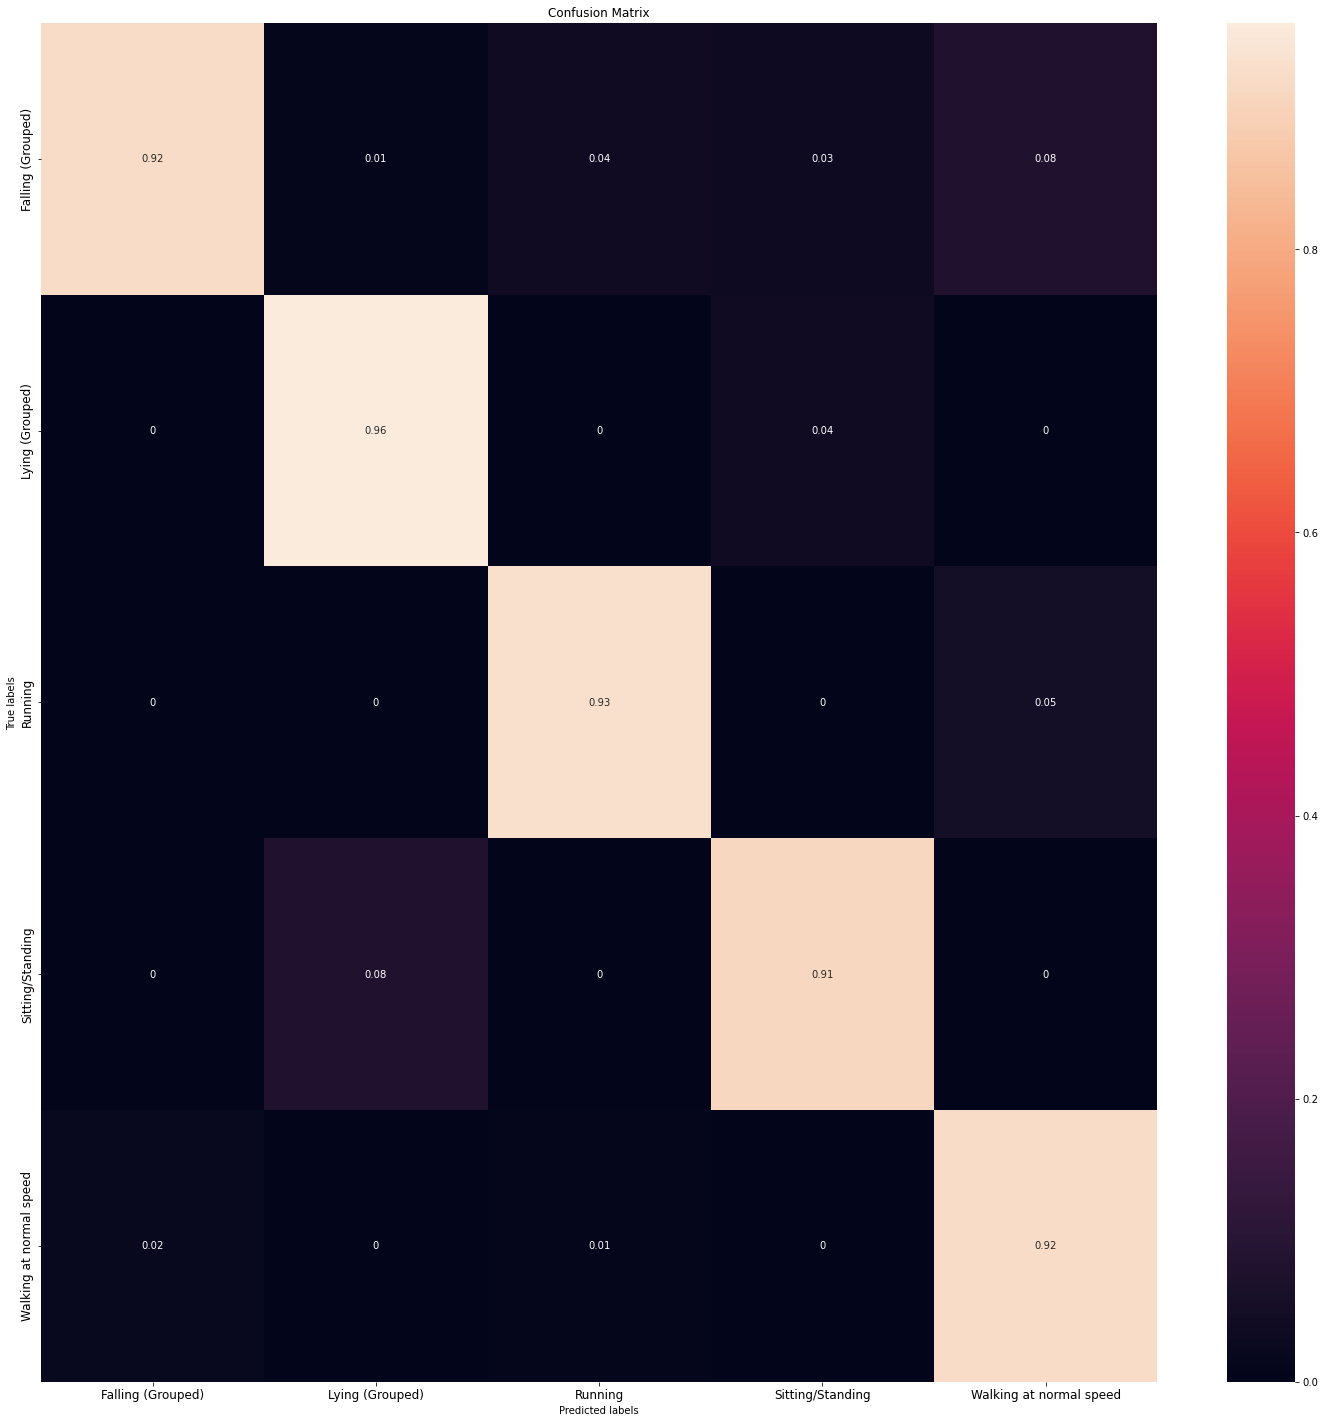

In [108]:
print(classification_report(y_truth, y_predictions,labels=[0,1,2,3,4]))

cm = confusion_matrix(y_truth,y_predictions)
cm_normalised = np.around(cm / cm.astype(np.float).sum(axis=1) , decimals=2)

fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm_normalised, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);

accuracies = cm_normalised.diagonal()
precisions = precision_score(y_truth, y_predictions, average=None)
recalls = recall_score(y_truth, y_predictions, average=None)
f1_scores = f1_score(y_truth, y_predictions, average=None)
for act, label in class_labels.items():
    print(f"{act}..... Accuracy: {accuracies[label]:.2f}, Precision: {precisions[label]:.2f}, Recall: {recalls[label]:.2f}, F-score: {f1_scores[label]:.2f}")



plt.savefig('confusion_matrix.png',dpi=300)




In [113]:
accuracies = cm_normalised.diagonal()
precisions = precision_score(y_truth, y_predictions, average='micro')
recalls = recall_score(y_truth, y_predictions, average='micro')
f1_scores = f1_score(y_truth, y_predictions, average='micro')
print(precisions)
print(recalls)
print(f1_scores)

0.9309716934282404
0.9309716934282404
0.9309716934282404


In [120]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
print(balanced_accuracy_score(y_truth, y_predictions))
print(accuracy_score(y_truth, y_predictions))

0.9294198460983102
0.9309716934282404


In [114]:
accuracies = cm_normalised.diagonal()
precisions = precision_score(y_truth, y_predictions, average='macro')
recalls = recall_score(y_truth, y_predictions, average='macro')
f1_scores = f1_score(y_truth, y_predictions, average='macro')
print(precisions)
print(recalls)
print(f1_scores)

0.9266269640457544
0.9294198460983102
0.927645306834027


In [121]:
avg_all_subjects = 0
for subject, history in loo_model_histories.items():
    print(subject , ": " , history.history['val_accuracy'][-1])
    avg_all_subjects += history.history['val_accuracy'][-1]

print("Model Accuracy - Leave one out: ", avg_all_subjects/len(loo_model_histories))

s1541031 :  0.7653061151504517
s1704145 :  0.9775561094284058
s1706154 :  0.9564102292060852
s1711661 :  0.9950124621391296
s1718069 :  0.9717646837234497
s1721256 :  0.47804877161979675
s1724067 :  0.9219512343406677
s1724279 :  0.9545454382896423
s1727780 :  0.984886646270752
s1732873 :  0.9817708134651184
s1757177 :  0.9197080135345459
s1761322 :  0.9925373196601868
s1800883 :  0.9951691031455994
s1801931 :  1.0
s1813106 :  0.984455943107605
s1817455 :  0.8810126781463623
s1817972 :  0.9768637418746948
s1822958 :  0.9845758080482483
s1823274 :  0.40049752593040466
s1824891 :  0.981675386428833
s1826390 :  0.9921671152114868
s1841064 :  0.9326683282852173
s1842093 :  1.0
s1843072 :  0.9064748287200928
s1850642 :  0.9597989916801453
s1864705 :  0.9855769276618958
s1865890 :  0.9754299521446228
s1870467 :  0.9537712931632996
s1870697 :  0.9050132036209106
s1891214 :  0.90625
s1893474 :  0.9872773289680481
s1894401 :  0.92555832862854
s1970333 :  0.9799635410308838
s2119637 :  0.9818181

In [151]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(y_pred_labels)

[0 0 0 ... 4 4 4]


In [152]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))
print(class_labels)

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       429
           1       0.98      0.97      0.97      1622
           2       0.95      1.00      0.97       377
           3       0.96      0.98      0.97      1623
           4       0.96      0.91      0.93       377

    accuracy                           0.96      4428
   macro avg       0.96      0.95      0.96      4428
weighted avg       0.96      0.96      0.96      4428

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


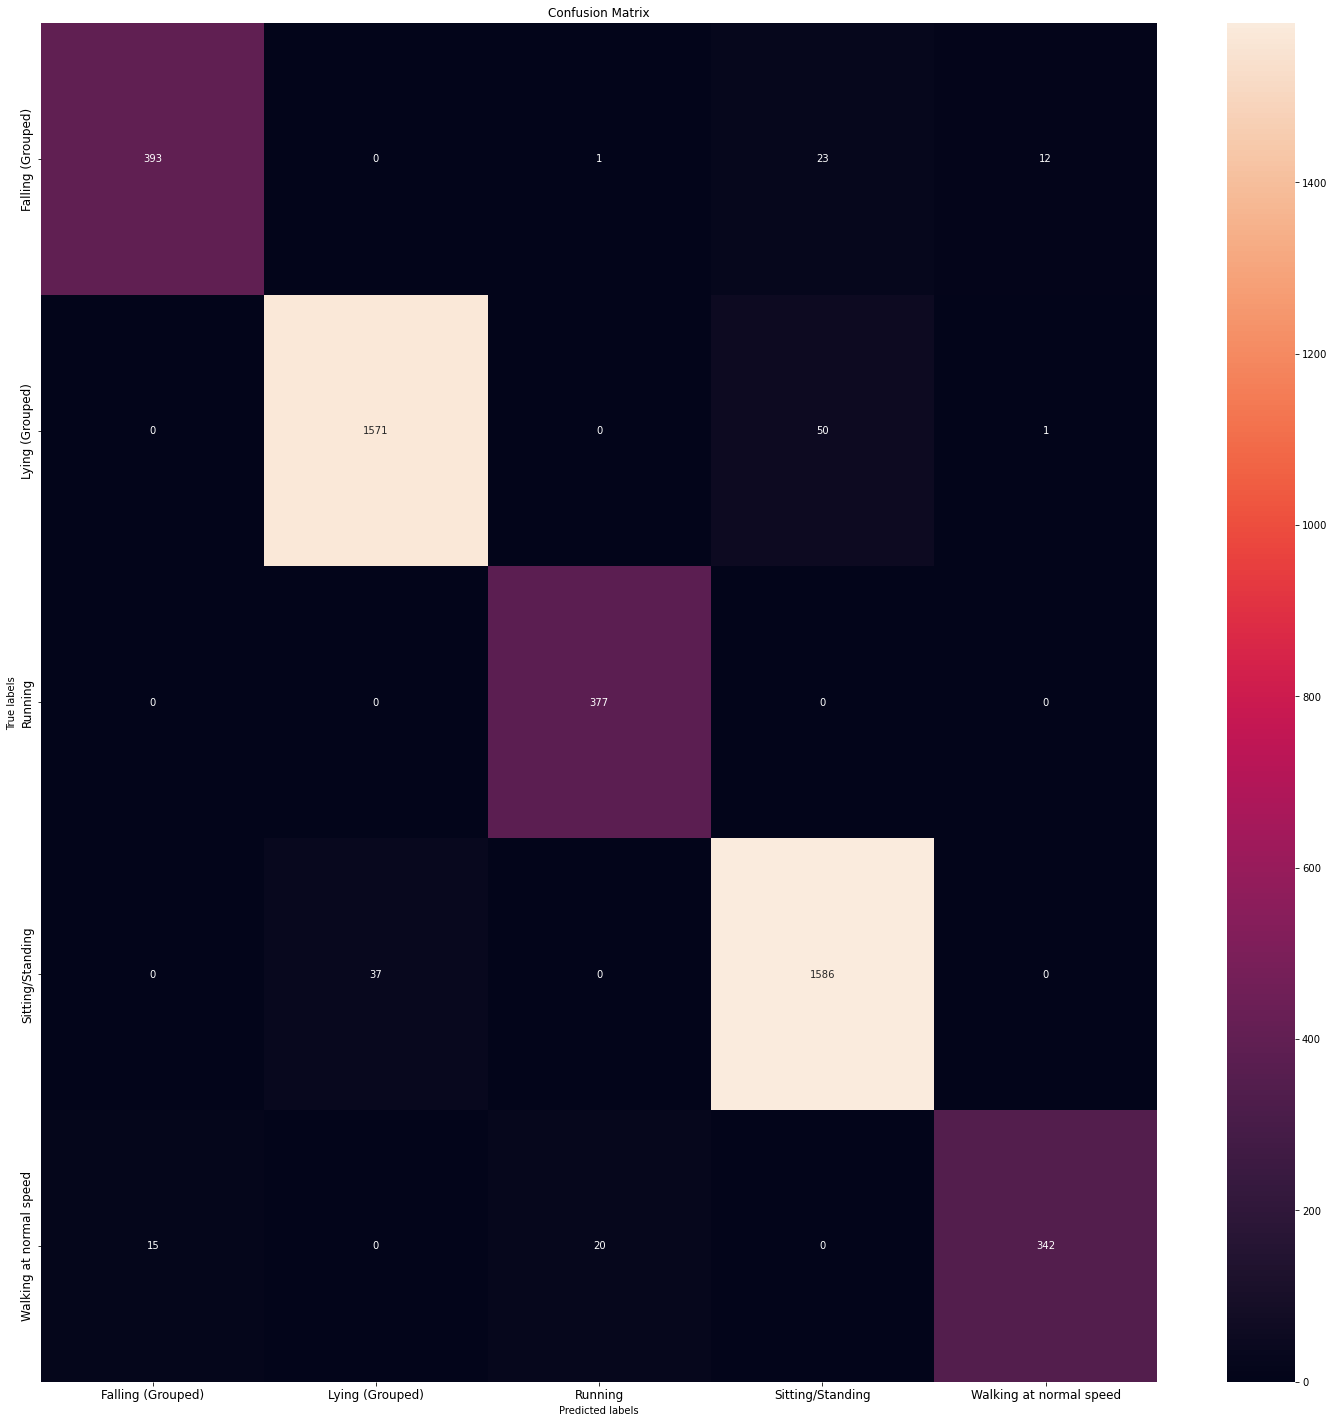

In [153]:
cm = confusion_matrix(y_true_labels,y_pred_labels)
cm_normalised = cm / cm.astype(np.float).sum(axis=1)

fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm_normalised, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);




## Compute Hierarchy


## Train best model on all subjects

In [80]:
window_size=25
step_size=25
step_size_falling=25

sliding_windows_all = group_into_sliding_windows(base_df[columns_of_interest_initial],window_size,step_size,step_size_falling)
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(sliding_windows_all)
X_train = np.asarray(X_train_regenerated)
y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)


model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.0005),
      loss="categorical_crossentropy",
metrics = ['accuracy'])



history = model.fit(X_train, y_train,
    batch_size=64, epochs=10, callbacks=[callback]    )


Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_45 (Conv1D)           (None, 23, 64)            1216      
_________________________________________________________________
batch_normalization_45 (Batc (None, 23, 64)            256       
_________________________________________________________________
activation_45 (Activation)   (None, 23, 64)            0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 23, 64)            0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 21, 64)            12352     
_________________________________________________________________
batch_normalization_46 (Batc (N

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

## Save Model

In [82]:
models_directory = './models/'
current_model_path = models_directory + 'CNN_model_HAR_v8_all_dataset/'

# tflite_model_filename = 'CNN_HAR_v1.tflite'#default features | Note: split randomly (around 40%)
# tflite_model_filename = 'CNN_HAR_v2.tflite' #default features + added dropout| Note: split by subject id, but sliding windows were grouped by activity_code (not good, mixed results)
# tflite_model_filename = 'CNN_HAR_v2_acc_86.tflite' #86 percent- information on this above
# tflite_model_filename = 'CNN_HAR_v4_acc_93.tflite' #93 percent- information on this above
tflite_model_filename = 'CNN_HAR_v5.tflite' #window==step size of 18
tflite_model_filename = 'CNN_HAR_v6.tflite' #window size of 40
tflite_model_filename = 'CNN_HAR_v8_25_windowsize.tflite' #window size of 50



In [82]:
#Save original model first. We will use the SavedModel to convert it to TFLite as recommended by the Tensorflow documentation.
tf.saved_model.save(model, current_model_path)

2021-11-25 18:30:47.656562: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/CNN_model_HAR_v8_all_dataset/assets


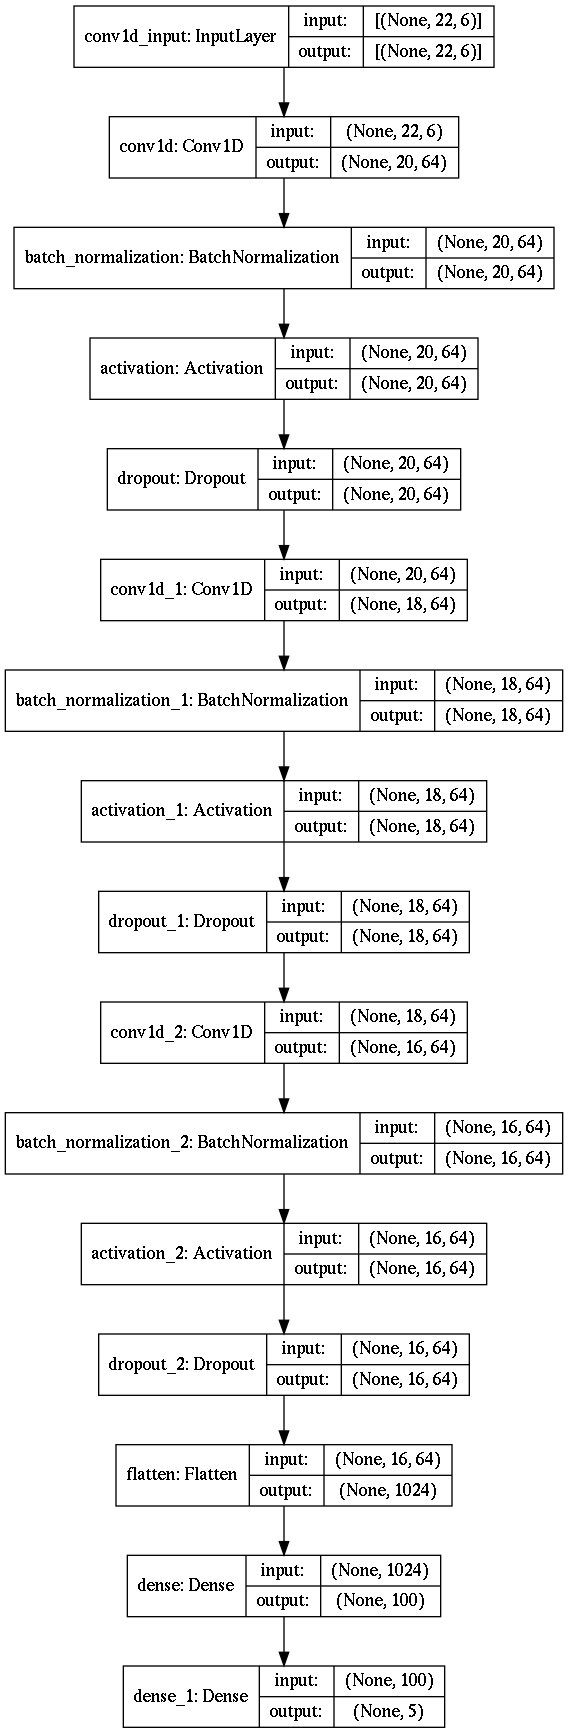

In [27]:
#Plot the model 
tf.keras.utils.plot_model(model, show_shapes=True)

### Compute Confusion matrix


In [150]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
### Load Original Model
model = tf.keras.models.load_model(current_model_path)

loo_model_histories = {}
logo = LeaveOneGroupOut()

y_predictions = []
y_truth = []

for train_ix, test_ix in logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id):
    

    X_train_df = X_with_subject_id.loc[train_ix]
    X_test_df = X_with_subject_id.loc[test_ix]

    y_train_df = y_with_subject_id.loc[train_ix]
    y_test_df = y_with_subject_id.loc[test_ix]
    
    window_size = 40 
    step_size = 25 
    step_size_falling=25

    X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
    X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)

    X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
    X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)
    
    X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

    y_pred_ohe = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_ohe, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)
    
    y_predictions.extend(y_pred_labels)
    y_truth.extend(y_true_labels)
    print(X_test_df.subject_id.unique())
    print(classification_report(y_true_labels, y_pred_labels))


    
    
    
cm = confusion_matrix(y_truth,y_predictions)

fig, ax= plt.subplots(figsize=(25, 25))
    # sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);


Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, subject_id, activity_code, activity_type, recording_id, window_id]
Index: []
X_train shape = (24595, 22, 6)
y_train shape = (24595, 5)
X_test shape = (543, 22, 6)
y_test shape = (543, 5)
['s1541031']
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       124
           1       0.50      0.75      0.60       167
           2       1.00      0.45      0.62        42
           3       0.49      0.25      0.33       168
           4       0.56      0.76      0.65        42

    accuracy                           0.62       543
   macro avg       0.70      0.64      0.63       543
weighted avg       0.64      0.62      0.60       543

Empty DataFrame
Columns: [accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, sub

KeyboardInterrupt: 

In [127]:
print(classification_report(y_true_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       0.99      0.69      0.81       145
           1       0.75      0.99      0.86       166
           2       1.00      0.19      0.32        42
           3       0.79      0.75      0.77       168
           4       0.55      0.98      0.70        42

    accuracy                           0.78       563
   macro avg       0.82      0.72      0.69       563
weighted avg       0.83      0.78      0.77       563



[1.         0.97520661 1.         0.83916084 0.63265306]
[0.92 0.96 0.93 0.91 0.92]


## Convert SavedModel to TFLite

In [83]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(current_model_path) # path to the SavedModel directory
tflite_model = converter.convert()
# Save the model.
with open(current_model_path+tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

2021-11-25 18:30:53.210503: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-11-25 18:30:53.210532: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-11-25 18:30:53.210539: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:325] Ignored change_concat_input_ranges.
2021-11-25 18:30:53.211197: I tensorflow/cc/saved_model/reader.cc:32] Reading SavedModel from: ./models/CNN_model_HAR_v8_all_dataset/
2021-11-25 18:30:53.215685: I tensorflow/cc/saved_model/reader.cc:55] Reading meta graph with tags { serve }
2021-11-25 18:30:53.215703: I tensorflow/cc/saved_model/reader.cc:93] Reading SavedModel debug info (if present) from: ./models/CNN_model_HAR_v8_all_dataset/
2021-11-25 18:30:53.215753: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2

## Quick Test on Python - Tensorflow Lite




In [85]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=current_model_path+tflite_model_filename)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print("Input Shape")
print(input_shape)
test = X_test.astype(np.float32)
#Test data to feed as parameter
test_part = test[2:3]
print("See Test Shape")
print(test_part.shape)

interpreter.set_tensor(input_details[0]['index'], test_part)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_results = np.squeeze(output_data)

print("Current output results")
print(output_results)
print(len(output_results))

print("Which is the most confident?")
max_index = np.argmax(output_results, axis=0)

print(max_index)



Input Shape
[ 1 25  6]
See Test Shape
(1, 25, 6)
Current output results
[9.9997854e-01 1.7925341e-07 3.6325449e-08 5.2548394e-06 1.5930696e-05]
5
Which is the most confident?
0
